## Introdução

O mercado de dados é formado por profissionais que transitaram de carreira, não só porque os diferentes cargos que existem hoje em dia são recentes e em constante mutação como também não existem graduações específicas para esses cargos.

No entanto, dentro dessa transição existe um grande divisor de águas, quem já trabalhava no setor de tecnologia (TI), que é o setor onde os cargos de dados se inserem, e os demais.

Posto isto, se levanta a seguinte pergunta:

* É mais difícil migrar de área para quem não se formou em TI?

E consequentemente:

* Que diferenças existem entre esses dois grupos? (TI e restantes formações)

## Objetivo

Assim sendo, esta análise irá tentar responder a essas perguntas.

### Análise preliminar

Importando as bibliotecas e o dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

#o desenvolvimento foi feito com os avisos ativos, para não gerar poluição são desligados na versão final
import warnings
warnings.filterwarnings('ignore')


HOME = %env HOME

dados = pd.read_csv(f'{HOME}/repos/state_data_21/data/State of Data 2021 - Dataset - Pgina1.csv')

Visão geral do dataset

In [2]:
#mudando as configurações default para melhorar a visibilidade
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

dados.head()

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_a ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_e ', 'Estado onde mora')","('P1_e_a ', 'uf onde mora')","('P1_e_b ', 'Regiao onde mora')","('P1_g_b ', 'Regiao de origem')","('P1_g_c ', 'Mudou de Estado?')","('P1_h ', 'Nivel de Ensino')","('P1_i ', 'Área de Formação')","('P2_a ', 'Qual sua situação atual de trabalho?')","('P2_b ', 'Setor')","('P2_c ', 'Numero de Funcionarios')","('P2_d ', 'Gestor?')","('P2_e ', 'Cargo como Gestor')","('P2_f ', 'Cargo Atual')","('P2_g ', 'Nivel')","('P2_h ', 'Faixa salarial')","('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')","('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')","('P2_k ', 'Você está satisfeito na sua empresa atual?')","('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')","('P2_l_a ', 'Falta de oportunidade de crescimento no emprego atual')","('P2_l_b ', 'Salário atual não corresponde ao mercado')","('P2_l_c ', 'Não tenho uma boa relação com meu líder/gestor')","('P2_l_d ', 'Gostaria de trabalhar em em outra área de atuação')","('P2_l_e ', 'Gostaria de receber mais benefícios')","('P2_l_f ', 'O clima de trabalho/ambiente não é bom')","('P2_l_g ', 'Falta de maturidade analítica na empresa')","('P2_m ', 'Você participou de entrevistas de emprego nos últimos 6 meses?')","('P2_n ', 'Você pretende mudar de emprego nos próximos 6 meses?')","('P2_o ', 'Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?')","('P2_o_a ', 'Remuneração/Salário')","('P2_o_b ', 'Benefícios')","('P2_o_c ', 'Propósito do trabalho e da empresa')","('P2_o_d ', 'Flexibilidade de trabalho remoto')","('P2_o_e ', 'Ambiente e clima de trabalho')","('P2_o_f ', 'Oportunidade de aprendizado e trabalhar com referências na área')","('P2_o_g ', 'Plano de carreira e oportunidades de crescimento profissional')","('P2_o_h ', 'Maturidade da empresa em termos de tecnologia e dados')","('P2_o_i ', 'Qualidade dos gestores e líderes')","('P2_o_j ', 'Reputação que a empresa tem no mercado')","('P2_q ', 'Atualmente qual a sua forma de trabalho?')","('P2_r ', 'Qual a forma de trabalho ideal para você?')","('P2_s ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?')","('P3_a ', 'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?')","('P3_b ', 'Quais desses papéis/cargos fazem parte do time (ou chapter) de dados da sua empresa?')","('P3_b_a ', 'Analytics Engineer')","('P3_b_b ', 'Engenharia de Dados/Data Engineer')","('P3_b_c ', 'Analista de Dados/Data Analyst')","('P3_b_d ', 'Cientista de Dados/Data Scientist')","('P3_b_e ', 'Database Administrator/DBA')","('P3_b_f ', 'Analista de Business Intelligence/BI')","('P3_b_g ', 'Arquiteto de Dados/Data Architect')","('P3_b_h ', 'Data Product Manager/DPM')","('P3_b_i ', 'Business Analyst')","('P3_c ', 'Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?')","('P3_c_a ', 'Pensar na visão de longo prazo de dados da empresa e fortalecimento da cultura analítica da companhia.')","('P3_c_b ', 'Organização de treinamentos e iniciativas com o objetivo de aumentar a maturidade analítica das áreas de negócios.')","('P3_c_c ', 'Atração, seleção e contratação de talentos para o time de dados.')","('P3_c_d ', 'Decisão sobre contratação de ferramentas e tecnologias relacionadas a dados.')","('P3_c_e ', 'Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados, garantindo a qualidade e confiabilidade da informação.')","('P3_c_f ', 'Sou gestor da equipe responsável pela entrega de dados, estudos, relatórios e dashboards para as áreas de negócio da empresa.')","('P3_c_g ', 'Sou gestor da equipe responsável por iniciativas e projetos envolvendo Inteligência Artificial e Machine Learning.')","('P3_c_h ', 'Apesar de ser gestor ainda atuo na part

Quantidade de colunas e respetivos tipos de variável

In [3]:
dados.shape

(2645, 356)

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2645 entries, 0 to 2644
Columns: 356 entries, ('P0', 'id') to ('P9_a_g ', 'Ainda não conhecia o Data Hackers')
dtypes: float64(293), int64(7), object(56)
memory usage: 7.2+ MB


Colunas númericas

In [5]:
dados.describe()

,"('P1_a ', 'Idade')","('P1_g_c ', 'Mudou de Estado?')","('P2_d ', 'Gestor?')","('P2_k ', 'Você está satisfeito na sua empresa atual?')","('P2_l_a ', 'Falta de oportunidade de crescimento no emprego atual')","('P2_l_b ', 'Salário atual não corresponde ao mercado')","('P2_l_c ', 'Não tenho uma boa relação com meu líder/gestor')","('P2_l_d ', 'Gostaria de trabalhar em em outra área de atuação')","('P2_l_e ', 'Gostaria de receber mais benefícios')","('P2_l_f ', 'O clima de trabalho/ambiente não é bom')","('P2_l_g ', 'Falta de maturidade analítica na empresa')","('P2_o_a ', 'Remuneração/Salário')","('P2_o_b ', 'Benefícios')","('P2_o_c ', 'Propósito do trabalho e da empresa')","('P2_o_d ', 'Flexibilidade de trabalho remoto')","('P2_o_e ', 'Ambiente e clima de trabalho')","('P2_o_f ', 'Oportunidade de aprendizado e trabalhar com referências na área')","('P2_o_g ', 'Plano de carreira e oportunidades de crescimento profissional')","('P2_o_h ', 'Maturidade da empresa em termos de tecnologia e dados')","('P2_o_i ', 'Qualidade dos gestores e líderes')","('P2_o_j ', 'Reputação que a empresa tem no mercado')","('P3_b_a ', 'Analytics Engineer')","('P3_b_b ', 'Engenharia de Dados/Data Engineer')","('P3_b_c ', 'Analista de Dados/Data Analyst')","('P3_b_d ', 'Cientista de Dados/Data Scientist')","('P3_b_e ', 'Database Administrator/DBA')","('P3_b_f ', 'Analista de Business Intelligence/BI')","('P3_b_g ', 'Arquiteto de Dados/Data Architect')","('P3_b_h ', 'Data Product Manager/DPM')","('P3_b_i ', 'Business Analyst')","('P3_c_a ', 'Pensar na visão de longo prazo de dados da empresa e fortalecimento da cultura analítica da companhia.')","('P3_c_b ', 'Organização de treinamentos e iniciativas com o objetivo de aumentar a maturidade analítica das áreas de negócios.')","('P3_c_c ', 'Atração, seleção e contratação de talentos para o time de dados.')","('P3_c_d ', 'Decisão sobre contratação de ferramentas e tecnologias relacionadas a dados.')","('P3_c_e ', 'Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados, garantindo a qualidade e confiabilidade da informação.')","('P3_c_f ', 'Sou gestor da equipe responsável pela entrega de dados, estudos, relatórios e dashboards para as áreas de negócio da empresa.')","('P3_c_g ', 'Sou gestor da equipe responsável por iniciativas e projetos envolvendo Inteligência Artificial e Machine Learning.')","('P3_c_h ', 'Apesar de ser gestor ainda atuo na parte técnica, construindo soluções/análises/modelos etc.')","('P3_c_i ', 'Gestão de projetos de dados, cuidando das etapas, equipes envolvidas, atingimento dos objetivos etc.')","('P3_c_j ', 'Gestão de produtos de dados, cuidando da visão dos produtos, backlog, feedback de usuários etc.')","('P3_c_k ', 'Gestão de pessoas, apoio no desenvolvimento das pessoas, evolução de carreira')","('P3_d_ ', 'a Contratar novos talentos.')","('P3_d_ ', 'b Reter talentos.')","('P3_d_ ', 'c Convencer a empresa a aumentar os investimentos na área de dados.')","('P3_d_ ', 'd Gestão de equipes no ambiente remoto.')","('P3_d_ ', 'e Gestão de projetos envolvendo áreas multidisciplinares da empresa.')","('P3_d_ ', 'f Organizar as informações e garantir a qualidade e confiabilidade.')","('P3_d_ ', 'g Conseguir processar e armazenar um alto volume de dados.')","('P3_d_ ', 'h Conseguir gerar valor para as áreas de negócios através de estudos e experimentos.')","('P3_d_ ', 'i Desenvolver e manter modelos Machine Learning em produção.')","('P3_d_ ', 'j Gerenciar a expectativa das áreas de negócio em relação as entregas das equipes de dados.')","('P3_d_ ', 'k Garantir a manutenção dos projetos e modelos em produção, em meio ao crescimento da empresa.')","('P3_d_l ', 'Conseguir levar inovação para a empresa através dos dados.')","('P3_d_m ', 'Garantir retorno do investimento (ROI) em projetos de dados.')","('P3_d_n ', 'Dividir o tempo entre entregas técnicas e gestão.')","('P4_b_a ', 'Dados relacionais (estruturados em bancos SQL)')

Colunas categóricas

In [6]:
dados.describe(include=[object])

,"('P0', 'id')","('P1_a_a ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_e ', 'Estado onde mora')","('P1_e_a ', 'uf onde mora')","('P1_e_b ', 'Regiao onde mora')","('P1_g_b ', 'Regiao de origem')","('P1_h ', 'Nivel de Ensino')","('P1_i ', 'Área de Formação')","('P2_a ', 'Qual sua situação atual de trabalho?')","('P2_b ', 'Setor')","('P2_c ', 'Numero de Funcionarios')","('P2_e ', 'Cargo como Gestor')","('P2_f ', 'Cargo Atual')","('P2_g ', 'Nivel')","('P2_h ', 'Faixa salarial')","('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')","('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')","('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')","('P2_m ', 'Você participou de entrevistas de emprego nos últimos 6 meses?')","('P2_n ', 'Você pretende mudar de emprego nos próximos 6 meses?')","('P2_o ', 'Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?')","('P2_q ', 'Atualmente qual a sua forma de trabalho?')","('P2_r ', 'Qual a forma de trabalho ideal para você?')","('P2_s ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?')","('P3_a ', 'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?')","('P3_b ', 'Quais desses papéis/cargos fazem parte do time (ou chapter) de dados da sua empresa?')","('P3_c ', 'Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?')","('P3_d ', 'Quais são os 3 maiores desafios que você tem como gestor no atual momento?')","('P4_a_a ', 'Mesmo que esse não seja seu cargo formal, você considera que sua atuação no dia a dia, reflete alguma das opções listadas abaixo?')","('P4_a ', 'Atuacao')","('P4_b ', 'Quais das fontes de dados listadas você já analisou ou processou no trabalho?')","('P4_c ', 'Entre as fontes de dados listadas, quais você utiliza na maior parte do tempo?')","('P4_d ', 'Quais das linguagens listadas abaixo você utiliza no trabalho?')","('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')","('P4_f ', 'Quais dos bancos de dados/fontes de dados listados abaixo você utiliza no trabalho?')","('P4_g ', 'Quais das opções de Cloud listadas abaixo você utiliza no trabalho?')","('P4_h ', 'Quais as Ferramentas de Business Intelligence você utiliza no trabalho?')","('P5_b ', 'Qual oportunidade você está buscando?')","('P5_c ', 'Há quanto tempo você busca uma oportunidade na área de dados?')","('P5_d ', 'Como tem sido a busca por um emprego na área de dados?')","('P6_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual como engenheiro de dados?')","('P6_b ', 'Quais as ferramentas/tecnologias de ETL que você utiliza no trabalho como Data Engineer?')","('P6_d ', 'Qual tecnologia utilizada como plataforma do Data Lake?')","('P6_f ', 'Qual tecnologia utilizada como plataforma do Data Warehouse?')","('P6_g ', 'Quais as ferramentas de gestão de Qualidade de dados, Metadados e catálogo de dados você utiliza no trabalho?')","('P6_h ', 'Em qual das opções abaixo você gasta a maior parte do seu tempo?')","('P7_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com análise de dados?')","('P7_b ', 'Quais as ferramentas/tecnologias de ETL que você utiliza no trabalho como Data Analyst?')","('P7_c ', 'Sua empresa utiliza alguma das ferramentas listadas para dar mais autonomia em análise de dados para as áreas de negócio?')","('P7_d ', 'Em qual das opções abaixo você gasta a maior parte do seu tempo de trabalho?')","('P8_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com ciência de dados?')","('P8_b ', 'Quais as técnicas e métodos listados abaixo você costuma utilizar no trabalho?')","('P8_c ', 'Quais dessas tecnologias fazem parte do seu dia a dia como cientista de dados?')","('P8_d ', 'Em qual das opções abaixo você gasta a maior parte do seu tempo no trabalho?'

Preenchimento e variabilidade e tipos 

In [7]:
consistency = pd.DataFrame({'columns' : dados.columns,
                    'type': dados.dtypes,
                    'missing' : dados.isna().sum(),
                    'size' : dados.shape[0],
                    'unique': dados.nunique()})
consistency['percentage'] = round(consistency['missing'] / consistency['size'],2)
consistency

,columns,type,missing,size,unique,percentage
"('P0', 'id')","('P0', 'id')",object,0,2645,2641,0.00
"('P1_a ', 'Idade')","('P1_a ', 'Idade')",float64,28,2645,37,0.01
"('P1_a_a ', 'Faixa idade')","('P1_a_a ', 'Faixa idade')",object,0,2645,9,0.00
"('P1_b ', 'Genero')","('P1_b ', 'Genero')",object,0,2645,3,0.00
"('P1_e ', 'Estado onde mora')","('P1_e ', 'Estado onde mora')",object,36,2645,21,0.01
"('P1_e_a ', 'uf onde mora')","('P1_e_a ', 'uf onde mora')",object,36,2645,21,0.01
"('P1_e_b ', 'Regiao onde mora')","('P1_e_b ', 'Regiao onde mora')",object,0,2645,6,0.00
"('P1_g_b ', 'Regiao de origem')","('P1_g_b ', 'Regiao de origem')",object,2161,2645,5,0.82
"('P1_g_c ', 'Mudou de Estado?')","('P1_g_c ', 'Mudou de Estado?')",int64,0,2645,2,0.00
"('P1_h ', 'Nivel de Ensino')","('P1_h ', 'Nivel de Ensino')",object,0,2645,7,0.00


Acima a coluna ID que deveria ser única aparenta ter dados duplicados.

In [8]:
dados["('P0', 'id')"].value_counts()

yrhjxwscdfl516bibgi0kyrhait8fbnf    2
deptbnmlg4p0iuonwodept7eeluh5ov4    2
7lkav4o0fukny1644lc7lkav4o0c5wsb    2
mdeq88ctdx127eztcxmdeq81poeki9ek    2
qkx4q0ei90wcjxnqkx4q0j3xgf0zn13s    1
                                   ..
t198yi4rtuwu507i6ozjy2t198yjf19k    1
t14vk15hwcx2w7t4r9t14vk8rybxsadv    1
t0qlvyy5cd2z8q0liht0ql7d22gisdos    1
t00leqn7a2b3b5l2gsby6pz7nt00leqn    1
037usz1h2yip96dgil4mhj037uszw1gk    1
Name: ('P0', 'id'), Length: 2641, dtype: int64

Como se pode verificar acima alguns ids se repetem, vamos investigar se são linhas duplicadas para tratar antes de começar qualquer análise.

In [9]:
dados[dados.duplicated(keep=False)]

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_a ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_e ', 'Estado onde mora')","('P1_e_a ', 'uf onde mora')","('P1_e_b ', 'Regiao onde mora')","('P1_g_b ', 'Regiao de origem')","('P1_g_c ', 'Mudou de Estado?')","('P1_h ', 'Nivel de Ensino')","('P1_i ', 'Área de Formação')","('P2_a ', 'Qual sua situação atual de trabalho?')","('P2_b ', 'Setor')","('P2_c ', 'Numero de Funcionarios')","('P2_d ', 'Gestor?')","('P2_e ', 'Cargo como Gestor')","('P2_f ', 'Cargo Atual')","('P2_g ', 'Nivel')","('P2_h ', 'Faixa salarial')","('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')","('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')","('P2_k ', 'Você está satisfeito na sua empresa atual?')","('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')","('P2_l_a ', 'Falta de oportunidade de crescimento no emprego atual')","('P2_l_b ', 'Salário atual não corresponde ao mercado')","('P2_l_c ', 'Não tenho uma boa relação com meu líder/gestor')","('P2_l_d ', 'Gostaria de trabalhar em em outra área de atuação')","('P2_l_e ', 'Gostaria de receber mais benefícios')","('P2_l_f ', 'O clima de trabalho/ambiente não é bom')","('P2_l_g ', 'Falta de maturidade analítica na empresa')","('P2_m ', 'Você participou de entrevistas de emprego nos últimos 6 meses?')","('P2_n ', 'Você pretende mudar de emprego nos próximos 6 meses?')","('P2_o ', 'Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?')","('P2_o_a ', 'Remuneração/Salário')","('P2_o_b ', 'Benefícios')","('P2_o_c ', 'Propósito do trabalho e da empresa')","('P2_o_d ', 'Flexibilidade de trabalho remoto')","('P2_o_e ', 'Ambiente e clima de trabalho')","('P2_o_f ', 'Oportunidade de aprendizado e trabalhar com referências na área')","('P2_o_g ', 'Plano de carreira e oportunidades de crescimento profissional')","('P2_o_h ', 'Maturidade da empresa em termos de tecnologia e dados')","('P2_o_i ', 'Qualidade dos gestores e líderes')","('P2_o_j ', 'Reputação que a empresa tem no mercado')","('P2_q ', 'Atualmente qual a sua forma de trabalho?')","('P2_r ', 'Qual a forma de trabalho ideal para você?')","('P2_s ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?')","('P3_a ', 'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?')","('P3_b ', 'Quais desses papéis/cargos fazem parte do time (ou chapter) de dados da sua empresa?')","('P3_b_a ', 'Analytics Engineer')","('P3_b_b ', 'Engenharia de Dados/Data Engineer')","('P3_b_c ', 'Analista de Dados/Data Analyst')","('P3_b_d ', 'Cientista de Dados/Data Scientist')","('P3_b_e ', 'Database Administrator/DBA')","('P3_b_f ', 'Analista de Business Intelligence/BI')","('P3_b_g ', 'Arquiteto de Dados/Data Architect')","('P3_b_h ', 'Data Product Manager/DPM')","('P3_b_i ', 'Business Analyst')","('P3_c ', 'Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?')","('P3_c_a ', 'Pensar na visão de longo prazo de dados da empresa e fortalecimento da cultura analítica da companhia.')","('P3_c_b ', 'Organização de treinamentos e iniciativas com o objetivo de aumentar a maturidade analítica das áreas de negócios.')","('P3_c_c ', 'Atração, seleção e contratação de talentos para o time de dados.')","('P3_c_d ', 'Decisão sobre contratação de ferramentas e tecnologias relacionadas a dados.')","('P3_c_e ', 'Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados, garantindo a qualidade e confiabilidade da informação.')","('P3_c_f ', 'Sou gestor da equipe responsável pela entrega de dados, estudos, relatórios e dashboards para as áreas de negócio da empresa.')","('P3_c_g ', 'Sou gestor da equipe responsável por iniciativas e projetos envolvendo Inteligência Artificial e Machine Learning.')","('P3_c_h ', 'Apesar de ser gestor ainda atuo na part

As linhas são de fato duplicadas então antes de qualquer análise iremos proceder à respetiva remoção.

In [10]:
dados.drop_duplicates().shape, dados.shape

((2641, 356), (2645, 356))

In [11]:
dados.drop_duplicates(inplace=True)
dados.shape

(2641, 356)

In [12]:
consistency = pd.DataFrame({'columns' : dados.columns,
                    'type': dados.dtypes,
                    'missing' : dados.isna().sum(),
                    'size' : dados.shape[0],
                    'unique': dados.nunique()})
consistency['percentage'] = round(consistency['missing'] / consistency['size'],2)
consistency

,columns,type,missing,size,unique,percentage
"('P0', 'id')","('P0', 'id')",object,0,2641,2641,0.00
"('P1_a ', 'Idade')","('P1_a ', 'Idade')",float64,28,2641,37,0.01
"('P1_a_a ', 'Faixa idade')","('P1_a_a ', 'Faixa idade')",object,0,2641,9,0.00
"('P1_b ', 'Genero')","('P1_b ', 'Genero')",object,0,2641,3,0.00
"('P1_e ', 'Estado onde mora')","('P1_e ', 'Estado onde mora')",object,36,2641,21,0.01
"('P1_e_a ', 'uf onde mora')","('P1_e_a ', 'uf onde mora')",object,36,2641,21,0.01
"('P1_e_b ', 'Regiao onde mora')","('P1_e_b ', 'Regiao onde mora')",object,0,2641,6,0.00
"('P1_g_b ', 'Regiao de origem')","('P1_g_b ', 'Regiao de origem')",object,2158,2641,5,0.82
"('P1_g_c ', 'Mudou de Estado?')","('P1_g_c ', 'Mudou de Estado?')",int64,0,2641,2,0.00
"('P1_h ', 'Nivel de Ensino')","('P1_h ', 'Nivel de Ensino')",object,0,2641,7,0.00


Agora que as entradas duplicadas foram removidas podemos prosseguir.

## Análise

Como esta análise deriva da área de formação de quem respondeu, o primeiro passo é olharmos como está esta distribuição. 

In [13]:
dados["('P1_i ', 'Área de Formação')"].value_counts()

Computação / Engenharia de Software / Sistemas de Informação/ TI    1092
Outras Engenharias                                                   606
Economia/ Administração / Contabilidade / Finanças                   378
Estatística/ Matemática / Matemática Computacional                   214
Marketing / Publicidade / Comunicação / Jornalismo                    75
Química / Física                                                      73
Outras                                                                52
Ciências Biológicas/Farmácia/Medicina/Área da Saúde                   47
Ciências Sociais                                                      40
Name: ('P1_i ', 'Área de Formação'), dtype: int64

In [14]:
dados["('P1_i ', 'Área de Formação')"].value_counts(normalize=True)

Computação / Engenharia de Software / Sistemas de Informação/ TI    0.423749
Outras Engenharias                                                  0.235157
Economia/ Administração / Contabilidade / Finanças                  0.146682
Estatística/ Matemática / Matemática Computacional                  0.083042
Marketing / Publicidade / Comunicação / Jornalismo                  0.029104
Química / Física                                                    0.028328
Outras                                                              0.020179
Ciências Biológicas/Farmácia/Medicina/Área da Saúde                 0.018238
Ciências Sociais                                                    0.015522
Name: ('P1_i ', 'Área de Formação'), dtype: float64

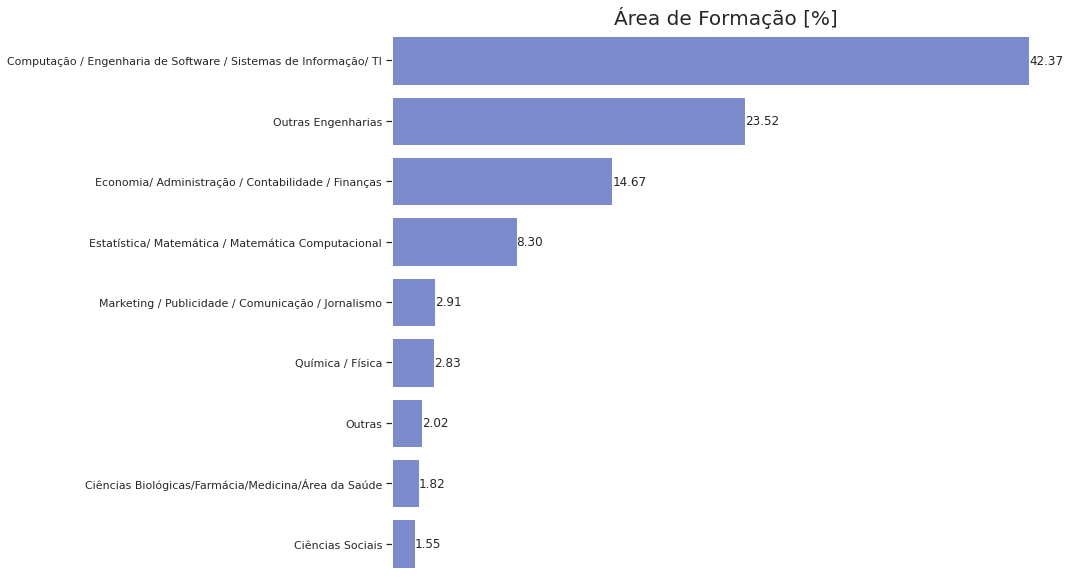

In [15]:
colors= ["#6d83da"]
sns.set_theme()
sns.set_style("ticks")
#sns.set_palette(colors)

P1_i ="('P1_i ', 'Área de Formação')"
fig = plt.figure(figsize=(12, 10))
ax = sns.barplot(data=dados, 
            x=dados[P1_i].value_counts(normalize=True).values*100, 
            y=dados[P1_i].value_counts(normalize=True).index,
            palette = colors
            )

ax.set_title('Área de Formação [%]', fontdict={'fontsize': 20, 'fontweight': 'medium'})

ax.set(xlabel=None)


for c in ax.containers:
    ax.bar_label(c, fmt=f'%.2f', label_type='edge')


ax.set(xlabel=None,ylabel=None)
ax.tick_params(labelbottom=False, bottom=False)

ax.spines['left'].set_visible(False)
ax.set(xticklabels=[])
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

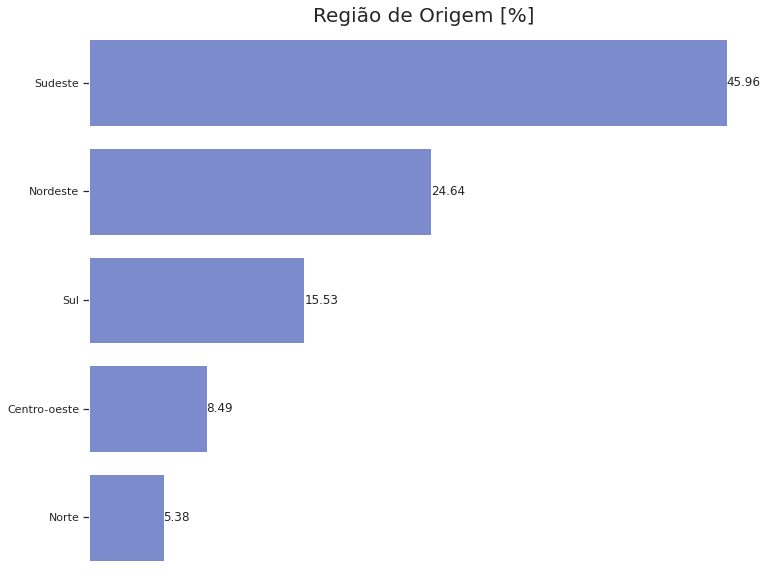

In [16]:
P1_g_b = "('P1_g_b ', 'Regiao de origem')"

colors= ["#6d83da"]
sns.set_theme()
sns.set_style("ticks")
#sns.set_palette(colors)

P1_i ="('P1_i ', 'Área de Formação')"
fig = plt.figure(figsize=(12, 10))
ax = sns.barplot(data=dados, 
            x=dados[P1_g_b].value_counts(normalize=True).values*100, 
            y=dados[P1_g_b].value_counts(normalize=True).index,
            palette = colors
            )

ax.set_title('Região de Origem [%]', fontdict={'fontsize': 20, 'fontweight': 'medium'})

ax.set(xlabel=None)


for c in ax.containers:
    ax.bar_label(c, fmt=f'%.2f', label_type='edge')


ax.set(xlabel=None,ylabel=None)
ax.tick_params(labelbottom=False, bottom=False)

ax.spines['left'].set_visible(False)
ax.set(xticklabels=[])
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

A formação em TI é de fato a predominante com 42% do total, seguida de outras engenharias com 23%.

Relativamente à distribuição por região a única que tem menor representação que a sua população respetiva é a região Norte que mesmo sendo [mais populosa](https://www.luis.blog.br/populacao-do-brasil-estados-e-regioes-dados-do-ibge.html) que o Centro-oeste aparece por último.

Para avançar na análise foi feito um pré levantamento, de forma empírica, das perguntas que nos podem ajudara responder às questões levantadas.
Se dividindo da seguinte forma:

Perguntas relevantes para o estudo

* ('P2_a ', 'Qual sua situação atual de trabalho?')
* ('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')
* ('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')
* ('P4_a ', 'Atuacao')
* ('P4_d_n ', 'Não utilizo nenhuma linguagem')
* ('P5_b ', 'Qual oportunidade você está buscando?')
* ('P5_c ', 'Há quanto tempo você busca uma oportunidade na área de dados?')
* ('P5_d ', 'Como tem sido a busca por um emprego na área de dados?') 

Perguntas relevantes para segmentação

* ('P1_a_a ', 'Faixa idade')
* ('P1_b ', 'Genero')
* ('P1_g_b ', 'Regiao de origem') 	
* ('P2_f ', 'Cargo Atual') 	
* ('P2_g ', 'Nivel') 	
* ('P2_h ', 'Faixa salarial') 	

Somente para não gerar código muito verboso, iremos gerar variáveis com os nomes das perguntas

In [17]:
P2_a = "('P2_a ', 'Qual sua situação atual de trabalho?')"
P2_i = "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"
P2_j = "('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')"
P4_a = "('P4_a ', 'Atuacao')"
P4_d_n = "('P4_d_n ', 'Não utilizo nenhuma linguagem')"
P5_b = "('P5_b ', 'Qual oportunidade você está buscando?')"
P5_c = "('P5_c ', 'Há quanto tempo você busca uma oportunidade na área de dados?')"
P5_d = "('P5_d ', 'Como tem sido a busca por um emprego na área de dados?')"

In [18]:
P1_a_a = "('P1_a_a ', 'Faixa idade')"
P1_b = "('P1_b ', 'Genero')"
P1_g_b = "('P1_g_b ', 'Regiao de origem')"
P2_f = "('P2_f ', 'Cargo Atual')"
P2_g = "('P2_g ', 'Nivel')"
P2_h = "('P2_h ', 'Faixa salarial')"

Para efeitos de estudo iremos dividir entre Computação / Engenharia de Software / Sistemas de Informação/ TI e as restantes formações.
Gerando datasets respetivos para cada um deles.

In [19]:
TI = dados.loc[dados.loc[:,"('P1_i ', 'Área de Formação')"] == 'Computação / Engenharia de Software / Sistemas de Informação/ TI']
resto = dados.loc[dados.loc[:,"('P1_i ', 'Área de Formação')"] != 'Computação / Engenharia de Software / Sistemas de Informação/ TI']
TI.shape, resto.shape

((1092, 356), (1549, 356))

In [20]:
dados.shape[0] - resto.shape[0]

1092

Como os totais são diferentes para efeitos comparativos iremos reduzir as categorias às porcentagens dos totais.
Sinalizando quando a volumetria dos respondentes for baixa.

### Situação atual de trabalho 

Todas as perguntas serão abordadas da mesma forma:
1. Listagem dos valores totais de cada grupo.
2. Construção do gráfico com os percentuais das categorias em cada grupo.
3. Análise do gráfico.
4. Derivações provenientes da análise no ponto 3.

In [21]:
#"('P2_a ', 'Qual sua situação atual de trabalho?')"
TI[P2_a].value_counts()

Empregado (CLT)                                                         733
Empreendedor ou Empregado (CNPJ)                                        113
Estagiário                                                               56
Servidor Público                                                         47
Vivo no Brasil e trabalho remoto para empresa de fora do Brasil (PJ)     34
Desempregado, buscando recolocação                                       31
Somente Estudante (graduação)                                            28
Trabalho na área Acadêmica/Pesquisador                                   18
Vivo fora do Brasil e trabalho para empresa de fora do Brasil            11
Freelancer                                                               10
Somente Estudante (pós-graduação)                                         7
Prefiro não informar                                                      2
Desempregado e não estou buscando recolocação                             2
Name: ('P2_a

In [22]:
TI[P2_a].value_counts().sum()

1092

In [23]:
resto[P2_a].value_counts()

Empregado (CLT)                                                         1001
Empreendedor ou Empregado (CNPJ)                                         160
Desempregado, buscando recolocação                                       100
Estagiário                                                                71
Servidor Público                                                          65
Somente Estudante (graduação)                                             43
Trabalho na área Acadêmica/Pesquisador                                    28
Freelancer                                                                19
Vivo no Brasil e trabalho remoto para empresa de fora do Brasil (PJ)      18
Somente Estudante (pós-graduação)                                         17
Vivo fora do Brasil e trabalho para empresa de fora do Brasil             16
Desempregado e não estou buscando recolocação                              6
Prefiro não informar                                                       5

In [24]:
resto[P2_a].value_counts().sum()

1549

Só para exemplificar como a ordenação das categorias foi realizada mantemos o código abaixo usado para ordenar as categorias. Nas demais perguntas este código será omitido.

In [25]:
resto[P2_a].value_counts().index

Index(['Empregado (CLT)', 'Empreendedor ou Empregado (CNPJ)',
       'Desempregado, buscando recolocação', 'Estagiário', 'Servidor Público',
       'Somente Estudante (graduação)',
       'Trabalho na área Acadêmica/Pesquisador', 'Freelancer',
       'Vivo no Brasil e trabalho remoto para empresa de fora do Brasil (PJ)',
       'Somente Estudante (pós-graduação)',
       'Vivo fora do Brasil e trabalho para empresa de fora do Brasil',
       'Desempregado e não estou buscando recolocação',
       'Prefiro não informar'],
      dtype='object')

In [26]:
#para manter as ordem das categorias nos gráficos em ambos datasets iremos criar uma variavél contendo a ordem desejada das mesmas.
labels_P2_a = ['Somente Estudante (graduação)',
               'Somente Estudante (pós-graduação)',
               'Trabalho na área Acadêmica/Pesquisador',
               'Estagiário',
               'Servidor Público',
    'Empregado (CLT)',
      'Empreendedor ou Empregado (CNPJ)',
               'Freelancer',
     'Vivo no Brasil e trabalho remoto para empresa de fora do Brasil (PJ)',
      'Vivo fora do Brasil e trabalho para empresa de fora do Brasil',
               'Desempregado, buscando recolocação',
               'Desempregado e não estou buscando recolocação',
               'Prefiro não informar'
]

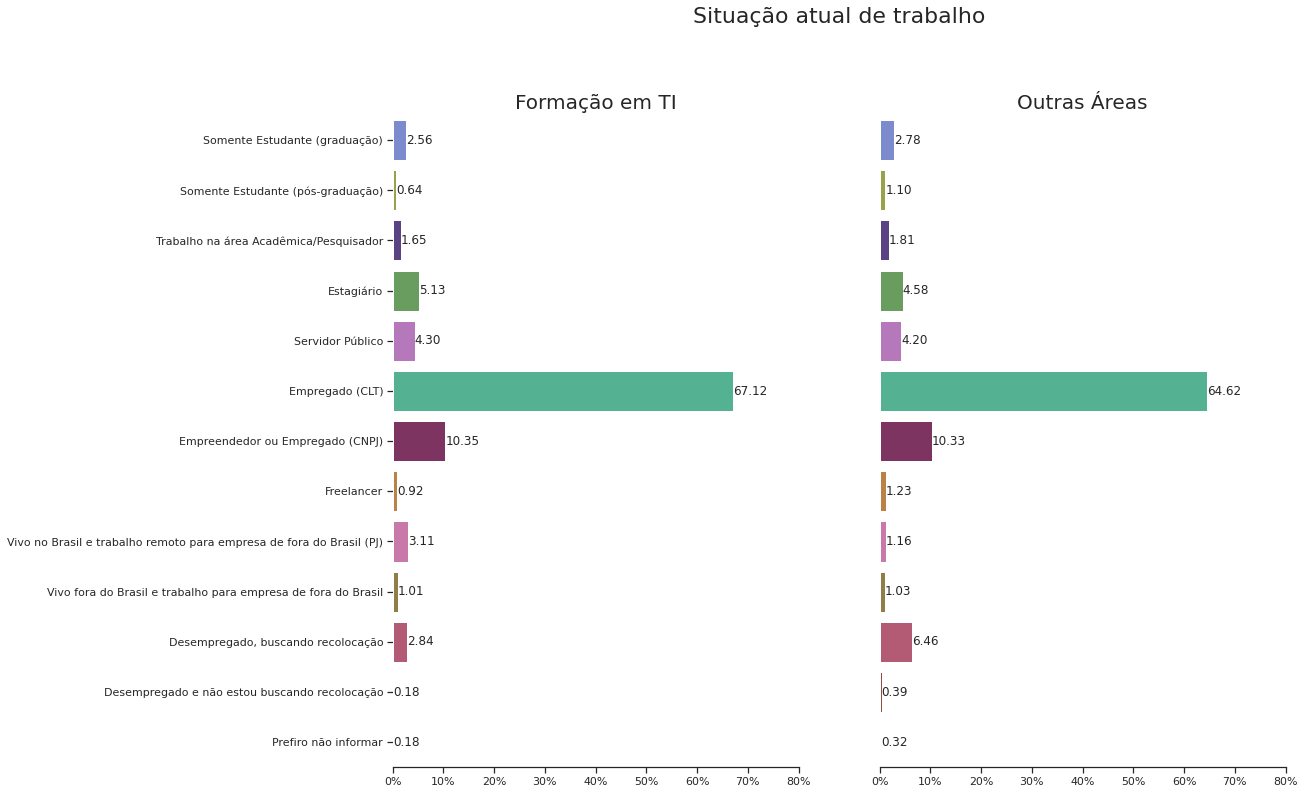

In [27]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(16,12))

top = 1.15
right = 1.1

colors= ["#6d83da",
"#a6af3f",
"#57398c",
"#60a755",
"#be6ec6",
"#45c097",
"#892863",
"#cd8233",
"#d56cad",
"#9d833c",
"#c24c6e",
"#a04534",
"#d3544b"]

sns.set_theme()
sns.set_style("ticks")
sns.set_palette(colors)



ax1 = sns.barplot(ax= axes[0],data=TI, x=TI[P2_a].value_counts(normalize=True).values*100,
                  y=TI[P2_a].value_counts(normalize=True).index,
                   order=labels_P2_a)

ax1.set_xlim(0, 80)
ax1.set(xlabel=None,ylabel=None)
ax1.set_title("Formação em TI",fontdict={'fontsize': 20})
vals = ax1.get_xticks()
ax1.set_xticklabels([str(int(val))+'%' for val in vals])



ax2 = sns.barplot(ax= axes[1],data=resto, x=resto[P2_a].value_counts(normalize=True).values*100,
                  y=resto[P2_a].value_counts(normalize=True).index,
                   order=labels_P2_a)

ax2.set_xlim(0, 80)
ax2.set(xlabel=None, ylabel=None)
ax2.set_title("Outras Áreas",fontdict={'fontsize': 20})
ax2.tick_params(labelleft=False, left=False)


for c in ax1.containers:
    ax1.bar_label(c, fmt=f'%.2f', label_type='edge')
    
for c in ax2.containers:
    ax2.bar_label(c, fmt=f'%.2f', label_type='edge')   
    
    

ax1.text(right, top, 'Situação atual de trabalho',
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax1.transAxes,
         fontdict={'fontsize': 22})

    
sns.despine()
ax2.spines['left'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.show()

Podemos ver no gráfico que existem 3 grandes grupos: 
* estudantes/pesquisadores,
* trabalhadores por conta prórpria ou de outrém,
* e desempregados.

Aparenta existir uma diferença de distribuição destes grupos dentro de área de TI e nas demais formações. 
Vamos então agrupar para investigar essa diferença com mais detalhe, no entanto como a categoria 'Prefiro não informar' não nos dá nenhuma informação sobre o grupo a que pertence vamos excluir no agrupamento abaixo.

In [28]:
studyingTI = TI[(TI[P2_a]=='Somente Estudante (graduação)') 
                | (TI[P2_a]== 'Somente Estudante (pós-graduação)') 
                | (TI[P2_a]== 'Trabalho na área Acadêmica/Pesquisador')
               ].shape[0]/TI.shape[0]*100

print("Estudantes TI: "+str(round(studyingTI,2))+'%')

Estudantes TI: 4.85%


In [29]:
studyingResto = resto[(resto[P2_a]=='Somente Estudante (graduação)') 
                      | (resto[P2_a]== 'Somente Estudante (pós-graduação)') 
                      | (resto[P2_a]== 'Trabalho na área Acadêmica/Pesquisador')
                     ].shape[0]/resto.shape[0]*100

print("Estudantes Resto: "+str(round(studyingResto,2))+'%')

Estudantes Resto: 5.68%


In [30]:
not_workingTI = TI[(TI[P2_a]=='Desempregado e não estou buscando recolocação') 
                   | (TI[P2_a]== 'Desempregado, buscando recolocação') 
                  ].shape[0]/TI.shape[0]*100

print("Desempregados TI: "+str(round(not_workingTI,2))+'%')

Desempregados TI: 3.02%


In [31]:
not_workingResto = resto[(resto[P2_a]=='Desempregado e não estou buscando recolocação') 
                         | (resto[P2_a]== 'Desempregado, buscando recolocação') 
                         ].shape[0]/TI.shape[0]*100

print("Desempregados Resto: "+str(round(not_workingResto,2))+'%')

Desempregados Resto: 9.71%


In [32]:
#apenas para exclusão do grupo sem informação abaixo
TI_sem_informacao = TI[(TI[P2_a]== 'Prefiro não informar')].shape[0]/TI.shape[0]*100
resto_sem_informacao = resto[(resto[P2_a]== 'Prefiro não informar')].shape[0]/resto.shape[0]*100

In [33]:
print("Trabalhadores TI: "+str(round(100-(studyingTI+not_workingTI+TI_sem_informacao),2))+'%')
print("Não Trabalhadores TI: "+str(round(studyingTI+not_workingTI,2))+'%')
print("Sem informação TI: "+str(round(TI_sem_informacao,2))+'%'+'\n')

print("Trabalhadores Resto: "+str(round(100-(studyingResto+not_workingResto+TI_sem_informacao),2))+'%')
print("Não Trabalhadores Resto: "+str(round(studyingResto+not_workingResto,2))+'%')
print("Sem informação Resto: "+str(round(resto_sem_informacao,2))+'%'+'\n')

Trabalhadores TI: 91.94%
Não Trabalhadores TI: 7.88%
Sem informação TI: 0.18%

Trabalhadores Resto: 84.43%
Não Trabalhadores Resto: 15.39%
Sem informação Resto: 0.32%



Como se percebe a maioria dos respondentes está trabalhando mas o percentual de não trabalhadores (estudantes + desempregados) é maior nas restantes formações.
E embora o percentual de estudantes apenas difira cerca de 1%, os desempregados diferem quase 7%.


O que é um indicativo que tem mais gente tentando migrar de área sem formação em TI, e também confirma o momento aquecido do mercado de TI , até porque é mais "difícil" estar desempregado num mercado aquecido.


## Tempo de experiência na área de dados

In [34]:
#('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')
TI[P2_i].value_counts()

de 2 a 3 anos                             199
de 4 a 5 anos                             163
de 1 a 2 anos                             152
Mais de 10 anos                           149
Menos de 1 ano                            144
de 6 a 10 anos                            141
Não tenho experiência na área de dados     58
Name: ('P2_i ', 'Quanto tempo de experiência na área de dados você tem?'), dtype: int64

In [35]:
TI[P2_i].value_counts().sum()

1006

In [36]:
resto[P2_i].value_counts()

de 1 a 2 anos                             294
de 2 a 3 anos                             287
Menos de 1 ano                            240
de 4 a 5 anos                             225
de 6 a 10 anos                            134
Mais de 10 anos                           111
Não tenho experiência na área de dados     64
Name: ('P2_i ', 'Quanto tempo de experiência na área de dados você tem?'), dtype: int64

In [37]:
resto[P2_i].value_counts().sum()

1355

In [38]:
labels_P2_i = ["Não tenho experiência na área de dados",
            "Menos de 1 ano",
            "de 1 a 2 anos",
            "de 2 a 3 anos",
            "de 4 a 5 anos",
            "de 6 a 10 anos",
            "Mais de 10 anos"]

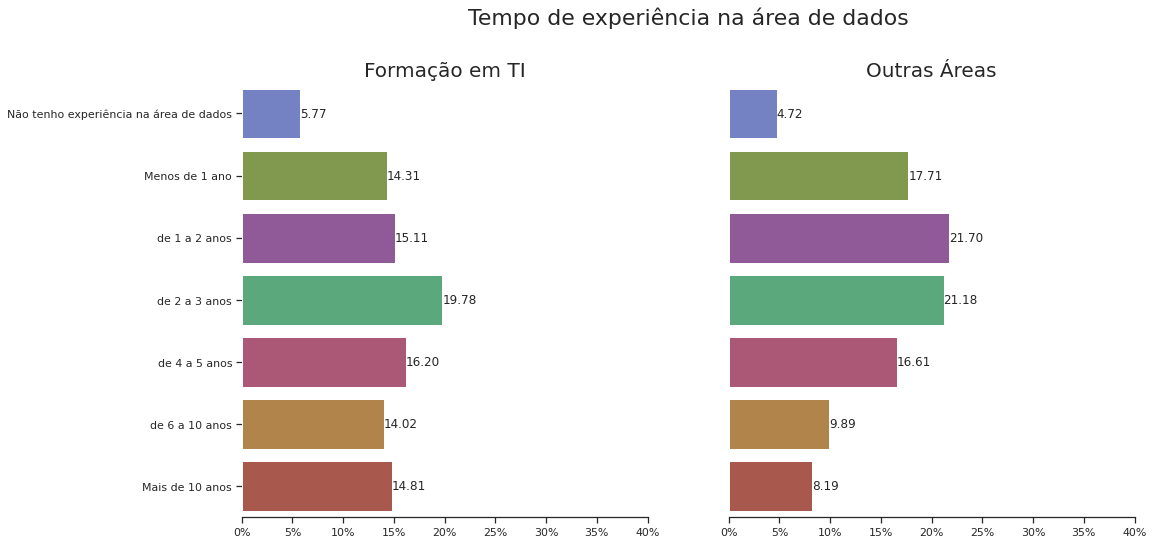

In [39]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(16,8))

top = 1.15
right = 1.1


colors= ["#6778d0",
"#86a542",
"#9750a1",
"#50b47b",
"#b94a73",
"#c18739",
"#b84c3e"]

sns.set_theme()
sns.set_style("ticks")
sns.set_palette(colors)



ax1 = sns.barplot(ax= axes[0],data=TI, x=TI[P2_i].value_counts(normalize=True).values*100,
                  y=TI[P2_i].value_counts(normalize=True).index,
                   order=labels_P2_i)

ax1.set_xlim(0, 40)
ax1.set(xlabel=None,ylabel=None) 
ax1.set_title("Formação em TI",fontdict={'fontsize': 20})
vals = ax1.get_xticks()
ax1.set_xticklabels([str(int(val))+'%' for val in vals])



ax2 = sns.barplot(ax= axes[1],data=resto, x=resto[P2_i].value_counts(normalize=True).values*100,
                  y=resto[P2_i].value_counts(normalize=True).index,
                   order=labels_P2_i)

ax2.set_xlim(0, 40)
ax2.set(xlabel=None, ylabel=None)
ax2.set_title("Outras Áreas",fontdict={'fontsize': 20})
ax2.tick_params(labelleft=False, left=False)



for c in ax1.containers:
    ax1.bar_label(c, fmt=f'%.2f', label_type='edge')

for c in ax2.containers:
    ax2.bar_label(c, fmt=f'%.2f', label_type='edge')  
    
    

ax1.text(right, top, 'Tempo de experiência na área de dados',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax1.transAxes,
        fontdict={'fontsize': 22})


sns.despine()
ax2.spines['left'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.show()

Podemos verificar que existe uma concentração maior no tempo de experiência entre 0 e 3 anos de quem vem de outras áreas.
Enquanto que na formação em TI a distribuição de experiência é mais uniforme.


Isto nos dá vários indícios:
* Quem tem formação em TI conhece a área de dados há mais tempo.
* Antigamente a área de dados procurava mais formação em TI.
* E os casos de sucesso junto com o momento quente da área de dados impulsionaram mais mudanças de carreira.



Também é curioso observarmos que o subgrupo que não tem experiência na área de dados, que é maior em TI (5,77% vs 4,72%), é diferente do subgrupo de desempregados, que é de 3,02% em TI e 9,71% nas restantes áreas.


Esta diferença levanta a hipótese de que quem não vem na área de TI necessita mais experiência para se efetivar na área de dados.

Porém verificamos se o subgrupo dos desempregados tinha respondido à questão de tempo de experiência na área de dados para poder investigar essa diferença. Mas como podemos ver abaixo não existe essa informação.

In [40]:
not_workingTI = TI[(TI[P2_a]=='Desempregado e não estou buscando recolocação') 
                   | (TI[P2_a]== 'Desempregado, buscando recolocação') 
                  ]

not_workingResto = resto[(resto[P2_a]=='Desempregado e não estou buscando recolocação') 
                         | (resto[P2_a]== 'Desempregado, buscando recolocação') 
                         ]


not_workingResto[P2_i].value_counts(), not_workingTI[P2_i].value_counts()

(Series([], Name: ('P2_i ', 'Quanto tempo de experiência na área de dados você tem?'), dtype: int64),
 Series([], Name: ('P2_i ', 'Quanto tempo de experiência na área de dados você tem?'), dtype: int64))

In [41]:
dados[(dados[P2_a]=='Desempregado e não estou buscando recolocação') 
                   | (dados[P2_a]== 'Desempregado, buscando recolocação') 
                  ][P2_i].value_counts()

Series([], Name: ('P2_i ', 'Quanto tempo de experiência na área de dados você tem?'), dtype: int64)

Se concluindo apenas que o percentual de pessoas tentando migrar de para a área de dados enquanto trabalham, na área de TI é ligeiramente superior (aproxidamente 1%) às demais áreas.

O que pode ser explicado pelo maior acesso à área de dados quando se está trabalhando na área de TI, seja porque a empresa já possui um setor de dados, ou simplesmente porque o networking de quem já está dentro do setor é mais efetivo.

## Tempo de experiência na área de TI/Engenharia de Software antes de começar a trabalhar 

In [42]:
#"('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')"
TI[P2_j].value_counts()

Menos de 1 ano                                                                                             169
Mais de 10 anos                                                                                            164
Não tive experiência na área de TI/Engenharia de Software antes de começar a trabalhar na área de dados    163
de 1 a 2 anos                                                                                              145
de 4 a 5 anos                                                                                              130
de 6 a 10 anos                                                                                             126
de 2 a 3 anos                                                                                              109
Name: ('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?'), dtype: int64

In [43]:
TI[P2_j].value_counts().sum()

1006

In [44]:
resto[P2_j].value_counts()

Não tive experiência na área de TI/Engenharia de Software antes de começar a trabalhar na área de dados    764
Menos de 1 ano                                                                                             277
de 1 a 2 anos                                                                                              121
de 2 a 3 anos                                                                                               69
Mais de 10 anos                                                                                             48
de 4 a 5 anos                                                                                               43
de 6 a 10 anos                                                                                              33
Name: ('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?'), dtype: int64

In [45]:
resto[P2_j].value_counts().sum()

1355

In [46]:
labels_P2_j = ['Não tive experiência na área de TI/Engenharia de Software antes de começar a trabalhar na área de dados',
               'Menos de 1 ano',
               'de 1 a 2 anos',
               'de 2 a 3 anos',
               'de 4 a 5 anos',
               'de 6 a 10 anos', 
               'Mais de 10 anos']

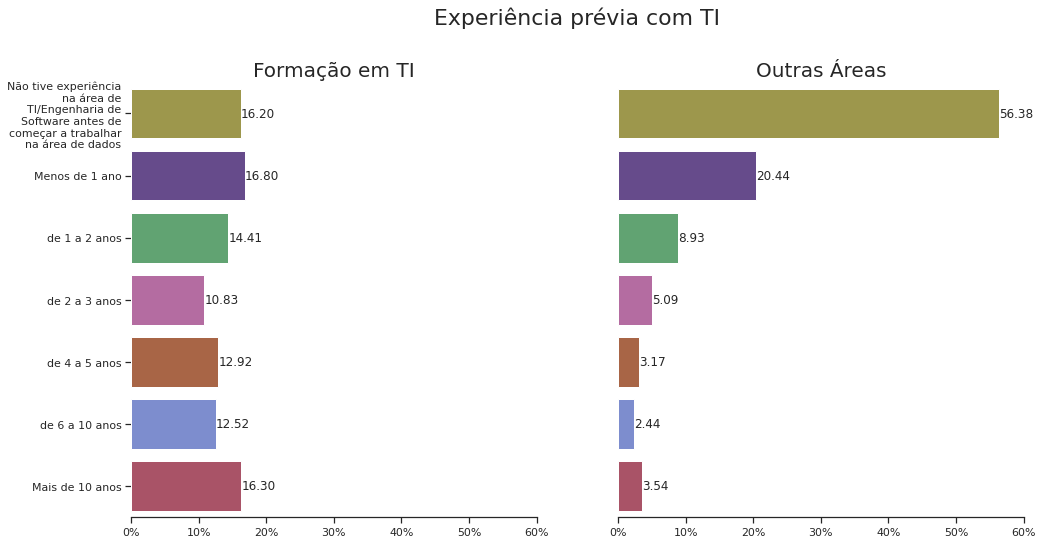

In [47]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(16,8))

top = 1.15
right = 1.1


colors= ["#aaa23f",
"#654096",
"#56ae6c",
"#c060a7",
"#b85f36",
"#6f85dc",
"#b74560"]

sns.set_theme()
sns.set_style("ticks")
sns.set_palette(colors)



ax1 = sns.barplot(ax= axes[0],data=TI, x=TI[P2_j].value_counts(normalize=True).values*100,
                  y=TI[P2_j].value_counts(normalize=True).index,
                   order=labels_P2_j)

ax1.tick_params(axis='x',labelrotation=0)
ax1.set_xlim(0, 60)
ax1.set(xlabel=None,ylabel=None)
ax1.set_title("Formação em TI",fontdict={'fontsize': 20})
vals = ax1.get_xticks()
ax1.set_xticklabels([str(int(val))+'%' for val in vals]);
ax1.set_yticklabels([textwrap.fill(e, 20) for e in labels_P2_j])



ax2 = sns.barplot(ax= axes[1],data=resto, x=resto[P2_j].value_counts(normalize=True).values*100,
                  y=resto[P2_j].value_counts(normalize=True).index,
                   order=labels_P2_j)

ax2.tick_params(axis='x',labelrotation=0)
ax2.set_xlim(0, 60)
ax2.set(xlabel=None, ylabel=None)
ax2.set_title("Outras Áreas",fontdict={'fontsize': 20})
ax2.tick_params(labelleft=False, left=False)


for c in ax1.containers:
    ax1.bar_label(c, fmt=f'%.2f', label_type='edge')
    
for c in ax2.containers:
    ax2.bar_label(c, fmt=f'%.2f', label_type='edge')    


ax1.text(right, top, 'Experiência prévia com TI',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax1.transAxes,
        fontdict={'fontsize': 22})


sns.despine()
ax2.spines['left'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.show()

Aqui podemos ver que os formados em TI migram para a área de dados em qualquer nível de maturidade da sua carreira.
Levantando a hipótese que isso talvez seja explicado parcialmente pela restruturação de cargos que o setor de dados sofreu nos últimos anos, que com a maturidade entende melhor qual é o limite de um desenvolvedor e um engenheiro de dados por exemplo.

Curioso é também verificar que existe um percentual significativo de pessoas com outras formações que já tinha atuado dentro do setor de TI (43,62%). Constítuindo assim um grupo com dupla migração de carreira.

In [48]:
TI[TI[P2_j]=='Não tive experiência na área de TI/Engenharia de Software antes de começar a trabalhar na área de dados'][P2_i].value_counts(normalize=True)*100

de 4 a 5 anos                             17.791411
Não tenho experiência na área de dados    17.177914
de 2 a 3 anos                             15.950920
Menos de 1 ano                            15.950920
Mais de 10 anos                           12.269939
de 6 a 10 anos                            10.429448
de 1 a 2 anos                             10.429448
Name: ('P2_i ', 'Quanto tempo de experiência na área de dados você tem?'), dtype: float64

In [49]:
resto[resto[P2_j]=='Não tive experiência na área de TI/Engenharia de Software antes de começar a trabalhar na área de dados'][P2_i].value_counts(normalize=True)*100

de 1 a 2 anos                             22.774869
de 2 a 3 anos                             19.371728
Menos de 1 ano                            17.931937
de 4 a 5 anos                             15.445026
de 6 a 10 anos                            10.863874
Não tenho experiência na área de dados     6.937173
Mais de 10 anos                            6.675393
Name: ('P2_i ', 'Quanto tempo de experiência na área de dados você tem?'), dtype: float64

## Atuação 

In [50]:
#"('P4_a ', 'Atuacao')"
TI[P4_a].value_counts()

Análise de Dados                      277
Engenharia de Dados                   265
Gestor                                215
Ciência de Dados                      145
Outra                                 117
Buscando emprego na área de dados.     73
Name: ('P4_a ', 'Atuacao'), dtype: int64

In [51]:
TI[P4_a].value_counts().sum()

1092

In [52]:
resto[P4_a].value_counts()

Análise de Dados                      572
Gestor                                292
Ciência de Dados                      265
Buscando emprego na área de dados.    171
Engenharia de Dados                   138
Outra                                 111
Name: ('P4_a ', 'Atuacao'), dtype: int64

In [53]:
resto[P4_a].value_counts().sum()

1549

In [54]:
labels_P4_a =["Análise de Dados",
    "Ciência de Dados",
    "Engenharia de Dados",
      "Gestor",
       "Outra",
    "Buscando emprego na área de dados."
]

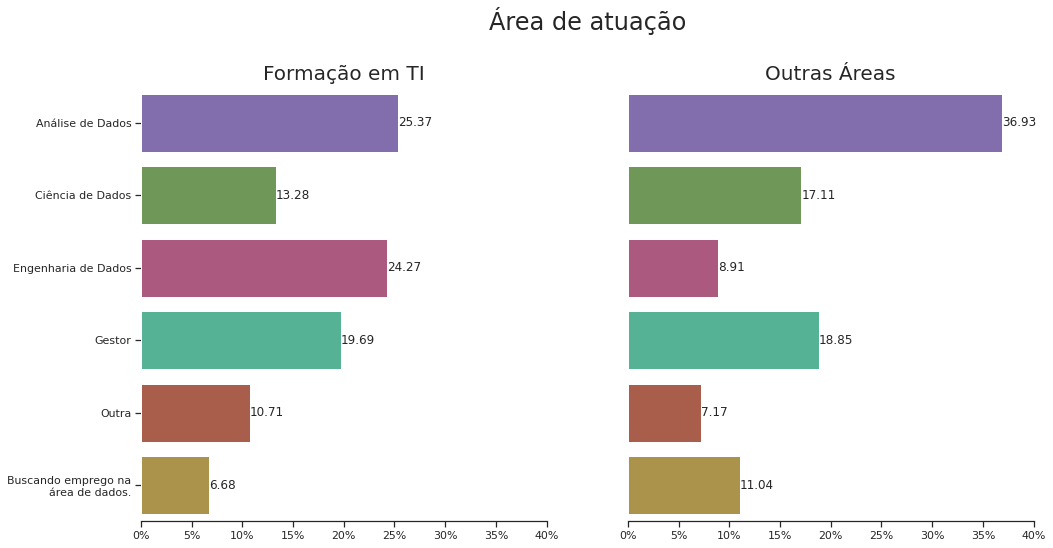

In [55]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(16,8))

top = 1.15
right = 1.1


colors= ["#7f62b8",
"#6ca24d",
"#b84c7d",
"#46c19a",
"#b8533c",
"#bc9b3c"]

sns.set_theme()
sns.set_style("ticks")
sns.set_palette(colors)



ax1 = sns.barplot(ax= axes[0],data=TI, x=TI[P4_a].value_counts(normalize=True).values*100,
                  y=TI[P4_a].value_counts(normalize=True).index,
                   order=labels_P4_a)

ax1.tick_params(axis='x',labelrotation=0)
ax1.set_xlim(0, 40)
ax1.set(xlabel=None,ylabel=None)
ax1.set_title("Formação em TI",fontdict={'fontsize': 20})
vals = ax1.get_xticks()
ax1.set_xticklabels([str(int(val))+'%' for val in vals]);
ax1.set_yticklabels([textwrap.fill(e, 20) for e in labels_P4_a])



ax2 = sns.barplot(ax= axes[1],data=resto, x=resto[P4_a].value_counts(normalize=True).values*100,
                  y=resto[P4_a].value_counts(normalize=True).index,
                   order=labels_P4_a)

ax2.tick_params(axis='x',labelrotation=0)
ax2.set_xlim(0, 40)
ax2.set(xlabel=None, ylabel=None)
ax2.set_title("Outras Áreas",fontdict={'fontsize': 20})
ax2.tick_params(labelleft=False, left=False)



for c in ax1.containers:
    ax1.bar_label(c, fmt=f'%.2f', label_type='edge')

for c in ax2.containers:
    ax2.bar_label(c, fmt=f'%.2f', label_type='edge')    


ax1.text(right, top, 'Área de atuação',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax1.transAxes,
        fontdict={'fontsize': 24})


sns.despine()
ax2.spines['left'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.show()

Conseguimos ver claramente que o cargo de Analista de dados é predominante entre quem não teve formação em TI, enquanto que a Engenharia de dados assume maior peso para quem é formado em TI.

Talvez isto se explique a análise de dados requer maior conhecimento específico do negócio, que acaba sendo uma competência que favorece quem já teve mais exposição a diferentes áreas, enquanto que a Engenharia de dados requer um maior domínio de programação, que obviamente favorece quem tem formação em TI.



Mas aqui surge um subgrupo que pode nos ajudar a responder à nossa questão inicial (É mais difícil migrar de área para quem não se formou em TI?), o grupo que está buscando emprego na área de dados, que é maior (cerca de 5%) entre entres os não formados em TI.




Antes de avançarmos para a análise da próxima questão vamos olhar rapidamente para os números totais deste subgrupo.

In [56]:
print('Quantos estão buscando emprego na área de dados\n')
print('TI: '+str(TI[TI[P4_a]=="Buscando emprego na área de dados."].shape[0]))
print('Resto: '+str(resto[resto[P4_a]=="Buscando emprego na área de dados."].shape[0]))

Quantos estão buscando emprego na área de dados

TI: 73
Resto: 171


In [57]:
print('Quantos '+ '\033[1m' + 'desempregados '+ '\033[0m'+'estão buscando emprego na área de dados\n')
print('TI: '+str(TI[TI[P2_a]=="Desempregado, buscando recolocação"].shape[0]))
print('Resto: '+str(resto[resto[P2_a]=="Desempregado, buscando recolocação"].shape[0]))

Quantos desempregados estão buscando emprego na área de dados

TI: 31
Resto: 100


In [58]:
print('Quantos responderam à pergunta P5_c (ver abaixo)\n')
print('TI: '+str(TI[P5_c].value_counts().sum()))
print('Resto: '+str(resto[P5_c].value_counts().sum()))

Quantos responderam à pergunta P5_c (ver abaixo)

TI: 39
Resto: 122


In [59]:
print('Quantos '+ '\033[1m' + 'desempregados '+ '\033[0m'+'responderam à pergunta P5_c (ver abaixo)\n')
print('TI: '+str(TI[TI[P2_a]=="Desempregado, buscando recolocação"][P5_c].value_counts().sum()))
print('Resto: '+str(resto[resto[P2_a]=="Desempregado, buscando recolocação"][P5_c].value_counts().sum()))

Quantos desempregados responderam à pergunta P5_c (ver abaixo)

TI: 19
Resto: 73


In [60]:
print('Percentual de desempregados entre os que estão buscando emprego\n')
print('TI: '+str(round(31/73*100,2))+'%')
print('Resto: '+str(round(100/171*100,2))+'%')

Percentual de desempregados entre os que estão buscando emprego

TI: 42.47%
Resto: 58.48%


In [61]:
print('Percentual de desempregados entre os que responderam à pergunta P5_c\n')
print('TI: '+str(round(19/39*100,2))+'%')
print('Resto: '+str(round(73/122*100,2))+'%')

Percentual de desempregados entre os que responderam à pergunta P5_c

TI: 48.72%
Resto: 59.84%


Vemos que quem está empregado mas buscando uma oportunidade teve uma tendência em não responder sobre há quanto o está fazendo, gerando um pequeno viés entre empregados e desempregados, em particular na área de TI (aproxidamente 6% vs 1,5%).
 

In [62]:
print('Percentual de pessoas buscando emprego que responderam à pergunta P5_c\n')
print('TI: '+str(round(39/73*100,2))+'%')
print('Resto: '+str(round(122/171*100,2))+'%')

Percentual de pessoas buscando emprego que responderam à pergunta P5_c

TI: 53.42%
Resto: 71.35%


Confirmamos aqui que nem todas as pessoas buscando emprego responderam sobre há quanto tempo o estão fazendo.

Mas o mais crítico é o viés entre as os respondentes, mais pessoas (18%) das restantes formações responderam à pergunta.
Então temos que ter esse viés em consideração na análise pergunta seguinte.


## Há quanto tempo você busca uma oportunidade na área de dados?

In [63]:
#"('P5_c ', 'Há quanto tempo você busca uma oportunidade na área de dados?')"
TI[P5_c].value_counts()

0 - 6 meses        30
7 meses - 1 ano     9
Name: ('P5_c ', 'Há quanto tempo você busca uma oportunidade na área de dados?'), dtype: int64

In [64]:
TI[P5_c].value_counts().sum()

39

In [65]:
resto[P5_c].value_counts()

0 - 6 meses        98
7 meses - 1 ano    18
1 ano - 2 anos      6
Name: ('P5_c ', 'Há quanto tempo você busca uma oportunidade na área de dados?'), dtype: int64

In [66]:
resto[P5_c].value_counts().sum()

122

In [67]:
TI.shape[0], resto.shape[0]

(1092, 1549)

Aqui vale alertar que estamos olhando um subgrupo pequeno, quando comparado ao original (TI de 1092 para 39, resto de 1549 para 122) 3,57% e 7,87% para TI e os demais respetivamente.

Nesta pergunta vamos olhar também o subgrupo dos desempregados.

In [68]:
TI[TI[P2_a]=="Desempregado, buscando recolocação"][P5_c].value_counts()

0 - 6 meses        16
7 meses - 1 ano     3
Name: ('P5_c ', 'Há quanto tempo você busca uma oportunidade na área de dados?'), dtype: int64

In [69]:
TI[TI[P2_a]=="Desempregado, buscando recolocação"][P5_c].value_counts().sum()

19

In [70]:
resto[resto[P2_a]=="Desempregado, buscando recolocação"][P5_c].value_counts()

0 - 6 meses        59
7 meses - 1 ano    12
1 ano - 2 anos      2
Name: ('P5_c ', 'Há quanto tempo você busca uma oportunidade na área de dados?'), dtype: int64

In [71]:
resto[resto[P2_a]=="Desempregado, buscando recolocação"][P5_c].value_counts().sum()

73

Para tentar o entender universo de quem respondeu a esta pergunta, assim como tentar descobrir as diferenças verificadas acima, vamos olhar a atividade atual destes respondentes.

In [72]:
TI[~TI[P5_c].isna()][P2_a].value_counts(normalize=True)

Desempregado, buscando recolocação               0.487179
Somente Estudante (graduação)                    0.358974
Somente Estudante (pós-graduação)                0.102564
Desempregado e não estou buscando recolocação    0.025641
Trabalho na área Acadêmica/Pesquisador           0.025641
Name: ('P2_a ', 'Qual sua situação atual de trabalho?'), dtype: float64

In [73]:
resto[~resto[P5_c].isna()][P2_a].value_counts(normalize=True)

Desempregado, buscando recolocação               0.598361
Somente Estudante (graduação)                    0.188525
Somente Estudante (pós-graduação)                0.106557
Trabalho na área Acadêmica/Pesquisador           0.090164
Desempregado e não estou buscando recolocação    0.016393
Name: ('P2_a ', 'Qual sua situação atual de trabalho?'), dtype: float64

A área de TI possui um grupo maior de estudantes, 17% a mais que as restantes áreas.

Enquanto que as demais áreas possuem mais desempregados (mais 11%), e mais acadêmicos (mais 6,5%).

In [74]:
labels_P5_c = ["0 - 6 meses",
               "7 meses - 1 ano",
               "1 ano - 2 anos"]

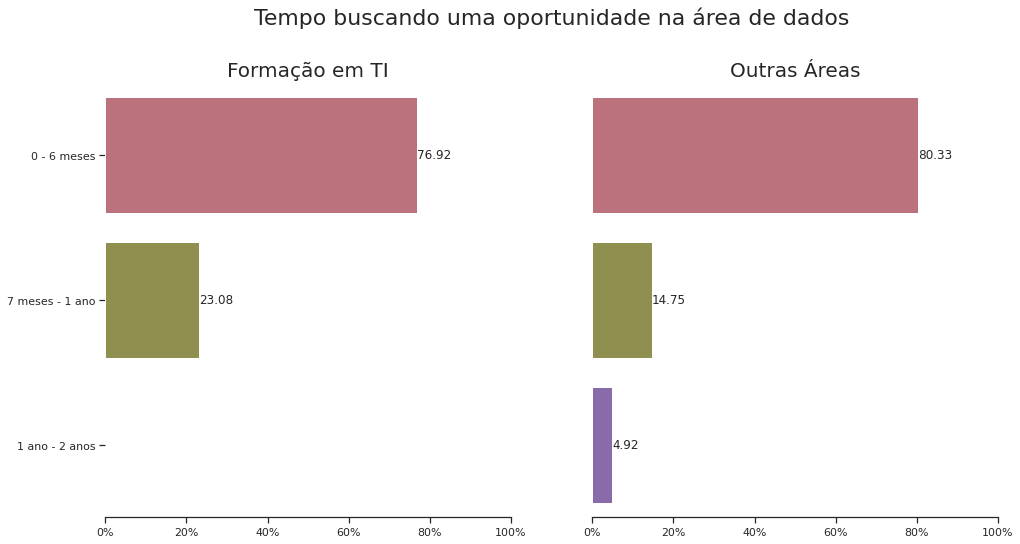

In [75]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(16,8))

top = 1.15
right = 1.1


colors= ["#c76674",
"#9a9945",
"#8961b3"]

sns.set_theme()
sns.set_style("ticks")
sns.set_palette(colors)



ax1 = sns.barplot(ax= axes[0],data=TI, x=TI[P5_c].value_counts(normalize=True).values*100,
                  y=TI[P5_c].value_counts(normalize=True).index,
                   order=labels_P5_c)

ax1.set_xlim(0, 100)
ax1.set(xlabel=None,ylabel=None)
ax1.set_title("Formação em TI",fontdict={'fontsize': 20})
vals = ax1.get_xticks()
ax1.set_xticklabels([str(int(val))+'%' for val in vals])



ax2 = sns.barplot(ax= axes[1],data=resto, x=resto[P5_c].value_counts(normalize=True).values*100,
                  y=resto[P5_c].value_counts(normalize=True).index,
                   order=labels_P5_c)

ax2.set_xlim(0, 100)
ax2.set(xlabel=None, ylabel=None)
ax2.set_title("Outras Áreas",fontdict={'fontsize': 20})
ax2.tick_params(labelleft=False, left=False)



for c in ax1.containers:
    ax1.bar_label(c, fmt=f'%.2f', label_type='edge')
    
for c in ax2.containers:
    ax2.bar_label(c, fmt=f'%.2f', label_type='edge') 


ax1.text(right, top, 'Tempo buscando uma oportunidade na área de dados',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax1.transAxes,
        fontdict={'fontsize': 22})


sns.despine()
ax2.spines['left'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.show()

Verficamos que apenas existem respondentes procurando emprego há mais de um ano entre quem não é formado em TI. Embora lembrando que isso possa ser enviesado pelo subgrupo de desempregados como vimos acima.

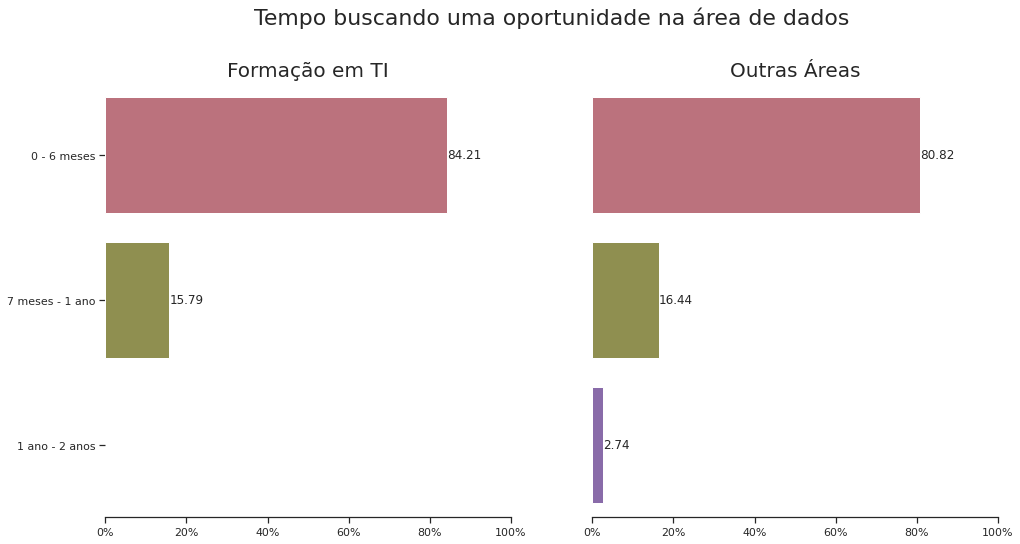

In [76]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(16,8))

top = 1.15
right = 1.1


colors= ["#c76674",
"#9a9945",
"#8961b3"]

sns.set_theme()
sns.set_style("ticks")
sns.set_palette(colors)



ax1 = sns.barplot(ax= axes[0],data=TI, x=TI[TI[P2_a]=="Desempregado, buscando recolocação"][P5_c].value_counts(normalize=True).values*100,
                  y=TI[TI[P2_a]=="Desempregado, buscando recolocação"][P5_c].value_counts(normalize=True).index,
                   order=labels_P5_c)

ax1.set_xlim(0, 100)
ax1.set(xlabel=None,ylabel=None)
ax1.set_title("Formação em TI",fontdict={'fontsize': 20})
vals = ax1.get_xticks()
ax1.set_xticklabels([str(int(val))+'%' for val in vals])



ax2 = sns.barplot(ax= axes[1],data=resto, x=resto[resto[P2_a]=="Desempregado, buscando recolocação"][P5_c].value_counts(normalize=True).values*100,
                  y=resto[resto[P2_a]=="Desempregado, buscando recolocação"][P5_c].value_counts(normalize=True).index,
                   order=labels_P5_c)

ax2.set_xlim(0, 100)
ax2.set(xlabel=None, ylabel=None)
ax2.set_title("Outras Áreas",fontdict={'fontsize': 20})
ax2.tick_params(labelleft=False, left=False)



for c in ax1.containers:
    ax1.bar_label(c, fmt=f'%.2f', label_type='edge')

for c in ax2.containers:
    ax2.bar_label(c, fmt=f'%.2f', label_type='edge') 


ax1.text(right, top, 'Tempo buscando uma oportunidade na área de dados',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax1.transAxes,
        fontdict={'fontsize': 22})


sns.despine()
ax2.spines['left'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.show()

No subgrupo de desempregados quem não é da área de TI está buscando emprego há mais tempo, tanto o grupo de 7 meses a 1 ano, como o grupo de 1 a 2 anos é maior.

## Como tem sido a busca por um emprego na área de dados?

In [77]:
#'P5_d ', 'Como tem sido a busca por um emprego na área de dados?'
TI[P5_d].value_counts()

Ainda não me candidatei a nenhuma vaga na área.                 19
Já me candidatei, mas nunca fui chamado para entrevistas.       14
Já participei de 1 a 3 entrevistas, mas não fui contratado.      5
Participei de mais de 3 entrevistas, mas não fui contratado.     1
Name: ('P5_d ', 'Como tem sido a busca por um emprego na área de dados?'), dtype: int64

In [78]:
TI[P5_d].value_counts().sum()

39

In [79]:
resto[P5_d].value_counts()

Ainda não me candidatei a nenhuma vaga na área.                           49
Já me candidatei, mas nunca fui chamado para entrevistas.                 35
Já participei de 1 a 3 entrevistas, mas não fui contratado.               27
Participei de mais de 3 entrevistas, mas não fui contratado.               8
Estou prestando alguns processos e esperando a chegada das entrevistas     1
Name: ('P5_d ', 'Como tem sido a busca por um emprego na área de dados?'), dtype: int64

In [80]:
resto[P5_d].value_counts().sum()

120

In [81]:
labels_P5_d = [
    "Ainda não me candidatei a nenhuma vaga na área.",
    "Já me candidatei, mas nunca fui chamado para entrevistas.",
    "Já participei de 1 a 3 entrevistas, mas não fui contratado.",
    "Participei de mais de 3 entrevistas, mas não fui contratado.",
    "Estou prestando alguns processos e esperando a chegada das entrevistas"
]

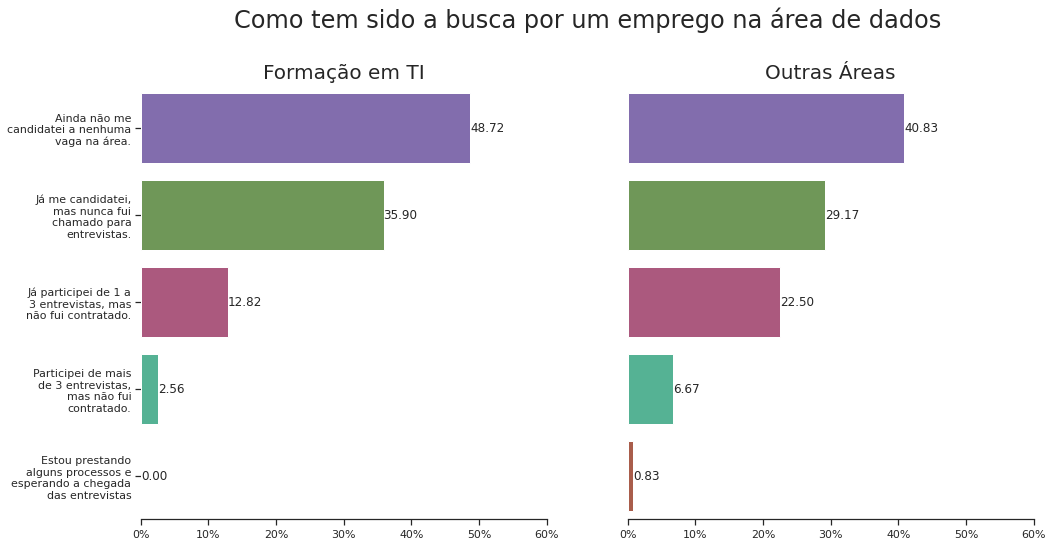

In [82]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(16,8))

top = 1.15
right = 1.1


colors= ["#7f62b8",
"#6ca24d",
"#b84c7d",
"#46c19a",
"#b8533c",
"#bc9b3c"]

sns.set_theme()
sns.set_style("ticks")
sns.set_palette(colors)


ax1 = sns.barplot(ax= axes[0],data=TI, 
                  x=np.append(TI[P5_d].value_counts(normalize=True).values*100,[0]),
                  y=np.append(TI[P5_d].value_counts(normalize=True).index,["Estou prestando alguns processos e esperando a chegada das entrevistas"]),
                order=labels_P5_d)

ax1.tick_params(axis='x',labelrotation=0)
ax1.set_xlim(0, 60)
ax1.set(xlabel=None,ylabel=None) 
ax1.set_title("Formação em TI",fontdict={'fontsize': 20})
vals = ax1.get_xticks()
ax1.set_xticklabels([str(int(val))+'%' for val in vals]);
ax1.set_yticklabels([textwrap.fill(e, 20) for e in labels_P5_d])



ax2 = sns.barplot(ax= axes[1],data=resto, x=resto[P5_d].value_counts(normalize=True).values*100,
                  y=resto[P5_d].value_counts(normalize=True).index,
                   order=labels_P5_d)

ax2.tick_params(axis='x',labelrotation=0)
ax2.set_xlim(0, 60)
ax2.set(xlabel=None, ylabel=None)
ax2.set_title("Outras Áreas",fontdict={'fontsize': 20})
ax2.tick_params(labelleft=False, left=False)



for c in ax1.containers:
    ax1.bar_label(c, fmt=f'%.2f', label_type='edge')
    
for c in ax2.containers:
    ax2.bar_label(c, fmt=f'%.2f', label_type='edge') 


ax1.text(right, top, 'Como tem sido a busca por um emprego na área de dados',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax1.transAxes,
        fontdict={'fontsize': 24})


sns.despine()
ax2.spines['left'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.show()

Vemos que temos mais pessoas não buscando ativamente (candidatando a vagas) dentro do grupo de TI, 8% a mais.

Assim como se observa que quem não é de TI está participando de mais entrevistas, tanto na categoria de 1 a 3 entrevistas como de mais de 3.

Isso pode nos indicar um grau de dificuldade maior para ser contratado entre os não formandos em TI, ou alternativamente que o grupo dos respondentes formados em TI está num estágio menos avançado da busca de emprego (vide primeiro ponto sobre a busca ativa).

## Qual oportunidade você está buscando?

In [83]:
#'P5_b ', 'Qual oportunidade você está buscando?'
TI[P5_b].value_counts()

Ciência de Dados/Data Scientist           20
Engenharia de Dados/Data Engineer         10
Análise de Dados/Data Analyst              7
Arquitetura de dados/Data Architecture     1
Name: ('P5_b ', 'Qual oportunidade você está buscando?'), dtype: int64

In [84]:
TI[P5_b].value_counts().sum()

38

In [85]:
resto[P5_b].value_counts()

Ciência de Dados/Data Scientist      66
Análise de Dados/Data Analyst        29
Engenharia de Dados/Data Engineer    10
Business Intelligence/BI             10
Business Analyst                      4
Name: ('P5_b ', 'Qual oportunidade você está buscando?'), dtype: int64

In [86]:
resto[P5_b].value_counts().sum()

119

In [87]:
labels_P5_b =["Ciência de Dados/Data Scientist",
    "Análise de Dados/Data Analyst",
              "Engenharia de Dados/Data Engineer",
             "Business Intelligence/BI",
              "Business Analyst",
              "Arquitetura de dados/Data Architecture"
]

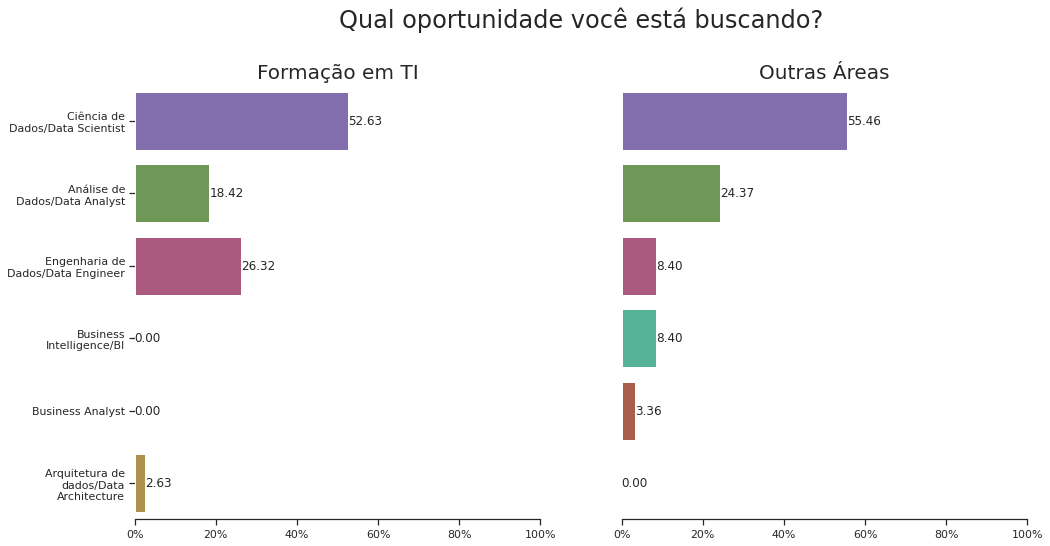

In [88]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(16,8))

top = 1.15
right = 1.1


colors= ["#7f62b8",
"#6ca24d",
"#b84c7d",
"#46c19a",
"#b8533c",
"#bc9b3c"]

sns.set_theme()
sns.set_style("ticks")
sns.set_palette(colors)


ax1 = sns.barplot(ax= axes[0],data=TI, x=np.append(TI[P5_b].value_counts(normalize=True).values*100,[0,0]),
                  y=np.append(TI[P5_b].value_counts(normalize=True).index,[ "Business Intelligence/BI",
              "Business Analyst"]),
                   order=labels_P5_b)

ax1.tick_params(axis='x',labelrotation=0)
ax1.set_xlim(0, 100)
ax1.set(xlabel=None,ylabel=None)
ax1.set_title("Formação em TI",fontdict={'fontsize': 20})
vals = ax1.get_xticks()
ax1.set_xticklabels([str(int(val))+'%' for val in vals])
ax1.set_yticklabels([textwrap.fill(e, 20) for e in labels_P5_b])



ax2 = sns.barplot(ax= axes[1],data=resto, x=np.append(resto[P5_b].value_counts(normalize=True).values*100,[0]),
                  y=np.append(resto[P5_b].value_counts(normalize=True).index,["Arquitetura de dados/Data Architecture"]),
                   order=labels_P5_b)

ax2.tick_params(axis='x',labelrotation=0)
ax2.set_xlim(0, 100)
ax2.set(xlabel=None, ylabel=None)
ax2.set_title("Outras Áreas",fontdict={'fontsize': 20})
ax2.tick_params(labelleft=False, left=False)



for c in ax1.containers:
    ax1.bar_label(c, fmt=f'%.2f', label_type='edge')

for c in ax2.containers:
    ax2.bar_label(c, fmt=f'%.2f', label_type='edge') 

    
ax1.text(right, top, 'Qual oportunidade você está buscando?',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax1.transAxes,
        fontdict={'fontsize': 24})

sns.despine()
ax2.spines['left'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.show()

Adicionando uma simples pesquisa por vagas no linkedin, no dia 09/07/2022 usando as palavras:
* Primeiro com o filtro de mundial (M) e
  * Data Scientist (DS),
  * Data Engineer (DE),
  * Data Analyst (DA).
* Segundo com o filtro de Brasil (BR) e
  * Cientista de dados (DS),
  * Engenheiro de dados (DE),
  * Analista de dados (DA).
Foram obtidos os seguintes resultados:
1. DS - 966.252 M, 15.229 BR
2. DE - 436.527 M, 2.033 BR
3. DA - 1.063.080 M, 16.336 BR

Embora apenas olhando a primeira página de resultados se observe que os resultados entre as pesquisas têm sobreposição.

Ao olharmos o gráfico acima vemos que o que as pessoas buscam não está alinhado com o que mercado oferece, em particular com as vagas de DS.

O que se observa é que DS é igualmente o cargo mais desejado, e quem é formado em TI tem um viés maior para DE enquanto que quem vem de outras áreas tem um viés maior por DA.
Quem é de TI não tem interesse por BI, e quem vem de outras áreas não tem interesse por arquitetura de dados.

## Segmentação

### Idade

In [89]:
#"('P1_a_a ', 'Faixa idade')"
TI[P1_a_a].value_counts()

25-29    295
30-34    247
35-39    173
22-24    125
40-44    108
45-49     58
17-21     53
50-54     23
55+       10
Name: ('P1_a_a ', 'Faixa idade'), dtype: int64

In [90]:
TI[P1_a_a].value_counts().sum()

1092

In [91]:
resto[P1_a_a].value_counts()

25-29    536
30-34    386
35-39    204
22-24    185
40-44     87
17-21     64
50-54     35
45-49     34
55+       18
Name: ('P1_a_a ', 'Faixa idade'), dtype: int64

In [92]:
resto[P1_a_a].value_counts().sum()

1549

In [93]:
labels_P1_a_a = ["17-21",
                 "22-24",
                 "25-29",
                 "30-34",
                 "35-39",
                 "40-44",
                 "45-49",
                 "50-54",
                 "55+"
                ]

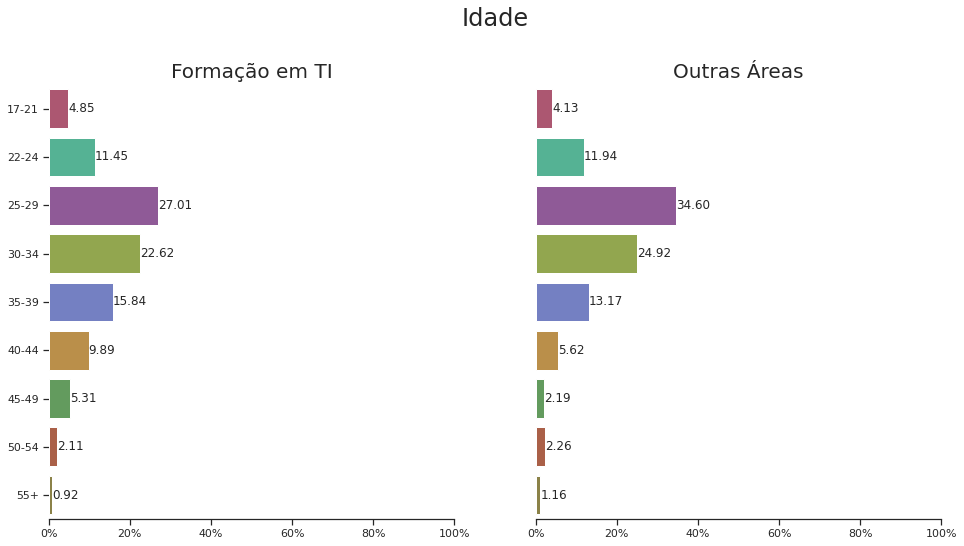

In [94]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(16,8))

top = 1.15
bottom = -0.25
right = 1.1



colors = ["#ba496b",
          "#46c19a",
          "#9750a1",
          "#9ab440",
          "#6777cf",
          "#cd9337",
          "#5aa554",
          "#ba5738",
          "#968a3d"]


sns.set_palette(colors)
sns.set_style("ticks")



ax1 = sns.barplot(ax= axes[0],
                  x=(TI[P1_a_a].value_counts(normalize=True).values)*100, 
                    y=TI[P1_a_a].value_counts(normalize=True).index,
                 order=labels_P1_a_a)
                  
ax1.tick_params(axis='x',labelrotation=0)
ax1.set_xlim(0, 100)
ax1.set(xlabel=None,ylabel=None)
ax1.set_title("Formação em TI",fontdict={'fontsize': 20})
vals = ax1.get_xticks()
ax1.set_xticklabels([str(int(val))+'%' for val in vals])



ax2 = sns.barplot(ax= axes[1], x=(resto[P1_a_a].value_counts(normalize=True).values)*100,
                  y=resto[P1_a_a].value_counts(normalize=True).index,
                  order=labels_P1_a_a)

ax2.tick_params(axis='x',labelrotation=0)
ax2.set_xlim(0, 100)
ax2.set(xlabel=None, ylabel=None)
ax2.set_title("Outras Áreas",fontdict={'fontsize': 20})
ax2.tick_params(labelleft=False, left=False)



for c in ax1.containers:
    ax1.bar_label(c, fmt=f'%.2f', label_type='edge')

for c in ax2.containers:
    ax2.bar_label(c, fmt=f'%.2f', label_type='edge')  

    
ax1.text(right, top, 'Idade',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax1.transAxes,
        fontdict={'fontsize': 24})    
    

sns.set_palette(sns.color_palette(colors))
sns.despine()
ax2.spines['left'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.show()

### Gênero

In [95]:
#"('P1_b ', 'Genero')"
TI[P1_b].value_counts()

Masculino    917
Feminino     173
Outro          2
Name: ('P1_b ', 'Genero'), dtype: int64

In [96]:
TI[P1_b].value_counts().sum()

1092

In [97]:
resto[P1_b].value_counts()

Masculino    1224
Feminino      319
Outro           6
Name: ('P1_b ', 'Genero'), dtype: int64

In [98]:
resto[P1_b].value_counts().sum()

1549

In [99]:
TI[P1_b].value_counts(normalize=True)

Masculino    0.839744
Feminino     0.158425
Outro        0.001832
Name: ('P1_b ', 'Genero'), dtype: float64

In [100]:
resto[P1_b].value_counts(normalize=True)

Masculino    0.790187
Feminino     0.205939
Outro        0.003873
Name: ('P1_b ', 'Genero'), dtype: float64

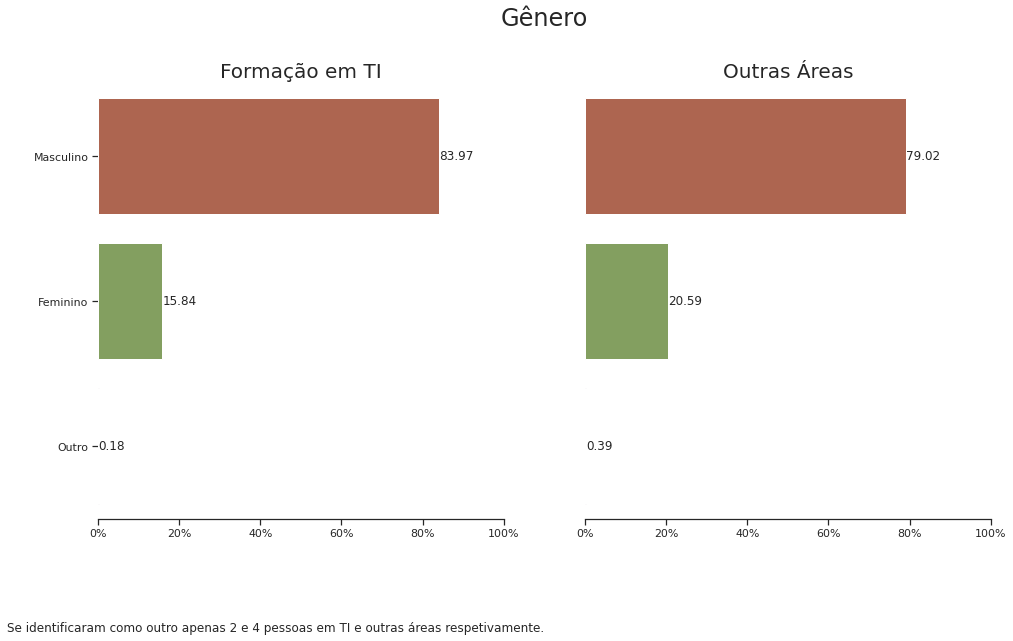

In [101]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(16,8))

top = 1.15
bottom = -0.25
right = 1.1



colors = ["#bc5d41",
          "#84a955",
          "#965da7"]


sns.set_palette(colors)
sns.set_style("ticks")



ax1 = sns.barplot(ax= axes[0],
                  x=(TI[P1_b].value_counts(normalize=True).values)*100, 
                    y=TI[P1_b].value_counts(normalize=True).index,)
                  
ax1.tick_params(axis='x',labelrotation=0)
ax1.set_xlim(0, 100)
ax1.set(xlabel=None,ylabel=None)
ax1.set_title("Formação em TI",fontdict={'fontsize': 20})
vals = ax1.get_xticks()
ax1.set_xticklabels([str(int(val))+'%' for val in vals])



ax2 = sns.barplot(ax= axes[1], x=(resto[P1_b].value_counts(normalize=True).values)*100,
                  y=resto[P1_b].value_counts(normalize=True).index,
                  )

ax2.tick_params(axis='x',labelrotation=0)
ax2.set_xlim(0, 100)
ax2.set(xlabel=None, ylabel=None)
ax2.set_title("Outras Áreas",fontdict={'fontsize': 20})
ax2.tick_params(labelleft=False, left=False)



for c in ax1.containers:
    ax1.bar_label(c, fmt=f'%.2f', label_type='edge')

for c in ax2.containers:
    ax2.bar_label(c, fmt=f'%.2f', label_type='edge')  

    
ax1.text(right, top, 'Gênero',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax1.transAxes,
        fontdict={'fontsize': 24})    
    
ax1.text(right, bottom, 'Se identificaram como outro apenas 2 e 4 pessoas em TI e outras áreas respetivamente.',
         horizontalalignment='right',
         verticalalignment='center',
         transform=ax1.transAxes,
        fontdict={'fontsize': 12})

sns.set_palette(sns.color_palette(colors))
sns.despine()
ax2.spines['left'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.show()

Mais mulheres em  outras áreas.

### Região de Origem

In [102]:
TI[P1_g_b].value_counts()

Sudeste         80
Nordeste        53
Sul             23
Centro-oeste    20
Norte           15
Name: ('P1_g_b ', 'Regiao de origem'), dtype: int64

In [103]:
TI[P1_g_b].value_counts().sum()

191

In [104]:
resto[P1_g_b].value_counts()

Sudeste         142
Nordeste         66
Sul              52
Centro-oeste     21
Norte            11
Name: ('P1_g_b ', 'Regiao de origem'), dtype: int64

In [105]:
resto[P1_g_b].value_counts().sum()

292

In [106]:
dados[P1_g_b].value_counts()

Sudeste         222
Nordeste        119
Sul              75
Centro-oeste     41
Norte            26
Name: ('P1_g_b ', 'Regiao de origem'), dtype: int64

In [107]:
labels_P1_g_b = ["Sudeste",
                 "Nordeste",
                 "Sul",
                 "Centro-oeste",
                 "Norte"]

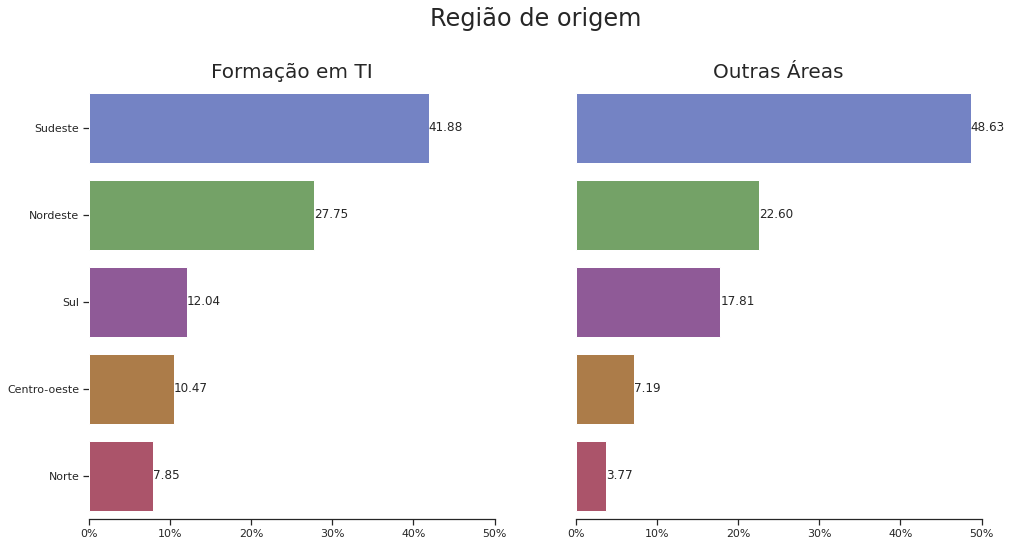

In [108]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(16,8))

top = 1.15
right = 1.1


colors= ["#677ad1",
"#6fac5d",
"#9750a1",
"#bc7d39",
"#b94663"]

sns.set_theme()
sns.set_style("ticks")
sns.set_palette(colors)



ax1 = sns.barplot(ax= axes[0],data=TI, x=TI[P1_g_b].value_counts(normalize=True).values*100,
                  y=TI[P1_g_b].value_counts(normalize=True).index,
                   order=labels_P1_g_b)

ax1.tick_params(axis='x',labelrotation=0)
ax1.set_xlim(0, 50)
ax1.set(xlabel=None,ylabel=None)
ax1.set_title("Formação em TI",fontdict={'fontsize': 20})

vals = ax1.get_xticks()
ax1.set_xticklabels([str(int(val))+'%' for val in vals])
ax1.set_yticklabels([textwrap.fill(e, 20) for e in labels_P1_g_b ])



ax2 = sns.barplot(ax= axes[1],data=resto, x=resto[P1_g_b].value_counts(normalize=True).values*100,
                  y=resto[P1_g_b].value_counts(normalize=True).index,
                   order=labels_P1_g_b)

ax2.tick_params(axis='x',labelrotation=0)
ax2.set_xlim(0, 50)
ax2.set(xlabel=None, ylabel=None)
ax2.set_title("Outras Áreas",fontdict={'fontsize': 20})
ax2.tick_params(labelleft=False, left=False)



for c in ax1.containers:
    ax1.bar_label(c, fmt=f'%.2f', label_type='edge')

for c in ax2.containers:
    ax2.bar_label(c, fmt=f'%.2f', label_type='edge') 

    
ax1.text(right, top, 'Região de origem',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax1.transAxes,
        fontdict={'fontsize': 24})  

sns.despine()
ax2.spines['left'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.show()

### Cargo Atual

In [109]:
#P2_f ', 'Cargo Atual')"
TI[P2_f].value_counts()

Engenheiro de Dados/Data Engineer                          198
Analista de BI/BI Analyst/Analytics Engineer               143
Cientista de Dados/Data Scientist                          118
Analista de Dados/Data Analyst                             106
Desenvolvedor ou Engenheiro de Software                     75
Outro                                                       30
Engenheiro de Machine Learning/ML Engineer                  26
Analista de Negócios/Business Analyst                       25
DBA/Administrador de Banco de Dados                         12
Analista de Sistemas/Analista de TI                         11
Técnico                                                     10
Suporte Técnico                                              8
Outras Engenharias (não inclui dev)                          7
Arquiteto de Dados                                           6
Analista Administrativo                                      5
Professor                                              

In [110]:
TI[P2_f].value_counts().sum()

791

In [111]:
resto[P2_f].value_counts()

Cientista de Dados/Data Scientist                          238
Analista de Dados/Data Analyst                             218
Analista de BI/BI Analyst/Analytics Engineer               195
Engenheiro de Dados/Data Engineer                          102
Outro                                                       83
Analista de Negócios/Business Analyst                       71
Outras Engenharias (não inclui dev)                         26
Estatístico                                                 24
Engenheiro de Machine Learning/ML Engineer                  21
Analista de Inteligência de Mercado/Market Intelligence     16
Desenvolvedor ou Engenheiro de Software                     16
Analista Administrativo                                     13
Analista de Marketing                                       12
Professor                                                    9
Suporte Técnico                                              5
Product Manager                                        

In [112]:
resto[P2_f].value_counts().sum()

1063

In [113]:
labels_P2_f = ['Cientista de Dados/Data Scientist', 'Analista de Dados/Data Analyst',
       'Analista de BI/BI Analyst/Analytics Engineer',
       'Engenheiro de Dados/Data Engineer', 'Outro',
       'Analista de Negócios/Business Analyst',
       'Outras Engenharias (não inclui dev)', 'Estatístico',
       'Engenheiro de Machine Learning/ML Engineer',
       'Analista de Inteligência de Mercado/Market Intelligence',
       'Desenvolvedor ou Engenheiro de Software', 'Analista Administrativo',
       'Analista de Marketing', 'Professor', 'Suporte Técnico',
       'Product Manager', 'Analista de Sistemas/Analista de TI', 'Técnico',
       'DBA/Administrador de Banco de Dados', 'Arquiteto de Dados',
       'Arquiteto de dados']

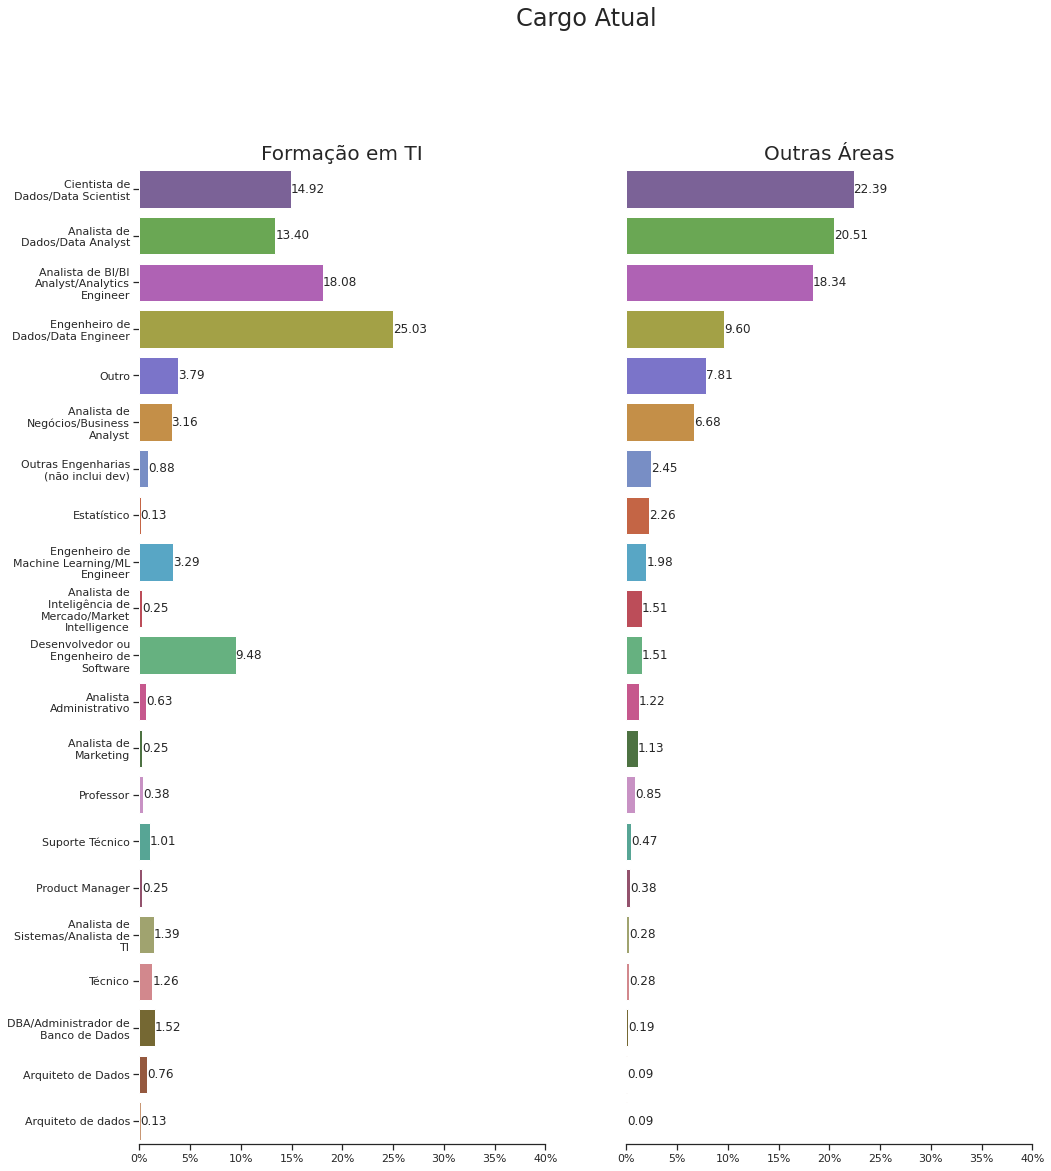

In [114]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(16,18))

top = 1.15
right = 1.1


colors= ["#7a59a0",
"#64b546",
"#bb54c2",
"#b3b036",
"#6f66d7",
"#d89234",
"#6b89d2",
"#d95a30",
"#46aed7",
"#ce3b4a",
"#5abd7c",
"#d8468c",
"#497a3a",
"#d189cb",
"#4ab29c",
"#9e476b",
"#a8ac66",
"#de7c83",
"#806e28",
"#a35331",
"#d69566"]

sns.set_theme()
sns.set_style("ticks")
sns.set_palette(colors)



ax1 = sns.barplot(ax= axes[0],data=TI, x=TI[P2_f].value_counts(normalize=True).values*100,
                  y=TI[P2_f].value_counts(normalize=True).index,
                   order=labels_P2_f)

ax1.tick_params(axis='x',labelrotation=0)
ax1.set_xlim(0, 40)
ax1.set(xlabel=None,ylabel=None)
ax1.set_title("Formação em TI",fontdict={'fontsize': 20})

vals = ax1.get_xticks()
ax1.set_xticklabels([str(int(val))+'%' for val in vals])
ax1.set_yticklabels([textwrap.fill(e, 20) for e in labels_P2_f])



ax2 = sns.barplot(ax= axes[1],data=resto, x=resto[P2_f].value_counts(normalize=True).values*100,
                  y=resto[P2_f].value_counts(normalize=True).index,
                   order=labels_P2_f)

ax2.tick_params(axis='x',labelrotation=0)
ax2.set_xlim(0, 40)
ax2.set(xlabel=None, ylabel=None)
ax2.set_title("Outras Áreas",fontdict={'fontsize': 20})
ax2.tick_params(labelleft=False, left=False)



for c in ax1.containers:
    ax1.bar_label(c, fmt=f'%.2f', label_type='edge')

for c in ax2.containers:
    ax2.bar_label(c, fmt=f'%.2f', label_type='edge') 

    
ax1.text(right, top, 'Cargo Atual',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax1.transAxes,
        fontdict={'fontsize': 24})  

sns.despine()
ax2.spines['left'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.show()

Mais DS em não TI, Mais DE em TI. Arquitetura de dados não tratada

### Nível de senioridade

In [115]:
#"('P2_g ', 'Nivel')"
TI[P2_g].value_counts()

Sênior    293
Pleno     291
Júnior    207
Name: ('P2_g ', 'Nivel'), dtype: int64

In [116]:
TI[P2_g].value_counts().sum()

791

In [117]:
resto[P2_g].value_counts()

Júnior    414
Pleno     366
Sênior    283
Name: ('P2_g ', 'Nivel'), dtype: int64

In [118]:
resto[P2_g].value_counts().sum()

1063

In [119]:
labels_P2_g = ["Sênior",
                 "Pleno",
                 "Júnior"
                ]

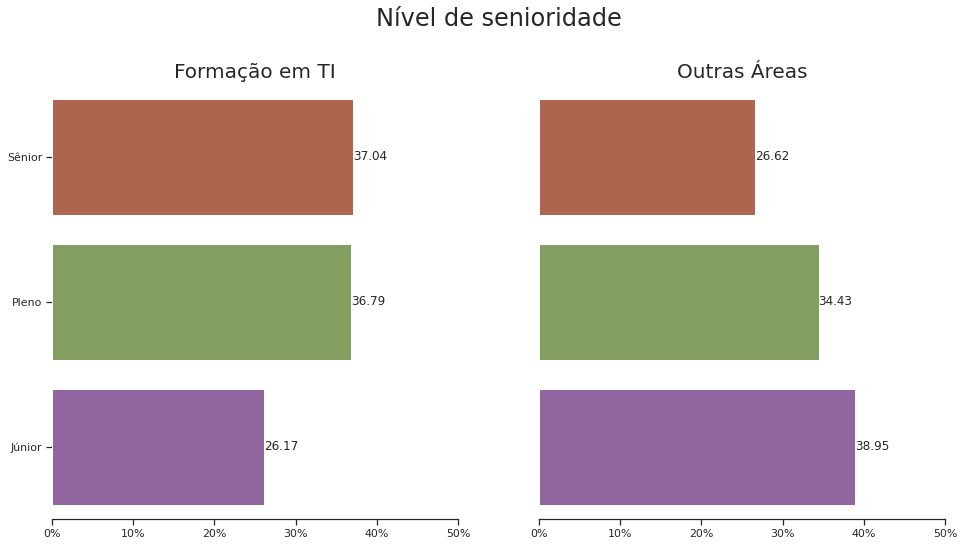

In [120]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(16,8))

top = 1.15
right = 1.1


colors = ["#bc5d41",
          "#84a955",
          "#965da7"]

sns.set_theme()
sns.set_style("ticks")
sns.set_palette(colors)



ax1 = sns.barplot(ax= axes[0],data=TI, x=TI[P2_g].value_counts(normalize=True).values*100,
                  y=TI[P2_g].value_counts(normalize=True).index,
                   order=labels_P2_g)

ax1.tick_params(axis='x',labelrotation=0)
ax1.set_xlim(0, 50)
ax1.set(xlabel=None,ylabel=None)
ax1.set_title("Formação em TI",fontdict={'fontsize': 20})

vals = ax1.get_xticks()
ax1.set_xticklabels([str(int(val))+'%' for val in vals])
ax1.set_yticklabels([textwrap.fill(e, 20) for e in labels_P2_g])



ax2 = sns.barplot(ax= axes[1],data=resto, x=resto[P2_g].value_counts(normalize=True).values*100,
                  y=resto[P2_g].value_counts(normalize=True).index,
                   order=labels_P2_g)

ax2.tick_params(axis='x',labelrotation=0)
ax2.set_xlim(0, 50)
ax2.set(xlabel=None, ylabel=None)
ax2.set_title("Outras Áreas",fontdict={'fontsize': 20})
ax2.tick_params(labelleft=False, left=False)



for c in ax1.containers:
    ax1.bar_label(c, fmt=f'%.2f', label_type='edge')

for c in ax2.containers:
    ax2.bar_label(c, fmt=f'%.2f', label_type='edge') 

    
ax1.text(right, top, 'Nível de senioridade',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax1.transAxes,
        fontdict={'fontsize': 24})  

sns.despine()
ax2.spines['left'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.show()

Mais sêniores em TI.

### Faixa salarial

In [121]:
#"('P2_h ', 'Faixa salarial')"
TI[P2_h].value_counts()

de R$ 8.001/mês a R$ 12.000/mês     210
de R$ 6.001/mês a R$ 8.000/mês      175
de R$ 4.001/mês a R$ 6.000/mês      138
de R$ 12.001/mês a R$ 16.000/mês    128
de R$ 16.001/mês a R$ 20.000/mês     71
de R$ 2.001/mês a R$ 3000/mês        66
de R$ 3.001/mês a R$ 4.000/mês       62
de R$ 1.001/mês a R$ 2.000/mês       53
de R$ 20.001/mês a R$ 25.000/mês     37
de R$ 25.001/mês a R$ 30.000/mês     21
de R$ 30.001/mês a R$ 40.000/mês     20
Menos de R$ 1.000/mês                13
Acima de R$ 40.001/mês               12
Name: ('P2_h ', 'Faixa salarial'), dtype: int64

In [122]:
TI[P2_h].value_counts().sum()

1006

In [123]:
resto[P2_h].value_counts()

de R$ 8.001/mês a R$ 12.000/mês     267
de R$ 4.001/mês a R$ 6.000/mês      264
de R$ 6.001/mês a R$ 8.000/mês      218
de R$ 12.001/mês a R$ 16.000/mês    134
de R$ 3.001/mês a R$ 4.000/mês      121
de R$ 2.001/mês a R$ 3000/mês       114
de R$ 1.001/mês a R$ 2.000/mês       73
de R$ 16.001/mês a R$ 20.000/mês     58
de R$ 20.001/mês a R$ 25.000/mês     25
Acima de R$ 40.001/mês               22
de R$ 25.001/mês a R$ 30.000/mês     22
Menos de R$ 1.000/mês                19
de R$ 30.001/mês a R$ 40.000/mês     18
Name: ('P2_h ', 'Faixa salarial'), dtype: int64

In [124]:
resto[P2_h].value_counts().sum()

1355

In [125]:
labels_P2_h = ["Acima de R$ 40.001/mês",
               "de R$ 30.001/mês a R$ 40.000/mês",
               "de R$ 25.001/mês a R$ 30.000/mês",
               "de R$ 20.001/mês a R$ 25.000/mês",
               "de R$ 16.001/mês a R$ 20.000/mês",
               "de R$ 12.001/mês a R$ 16.000/mês",
               "de R$ 8.001/mês a R$ 12.000/mês",
               "de R$ 6.001/mês a R$ 8.000/mês",
               "de R$ 4.001/mês a R$ 6.000/mês",
               "de R$ 3.001/mês a R$ 4.000/mês",
               "de R$ 2.001/mês a R$ 3000/mês",
               "de R$ 1.001/mês a R$ 2.000/mês",
               "Menos de R$ 1.000/mês"
              ]

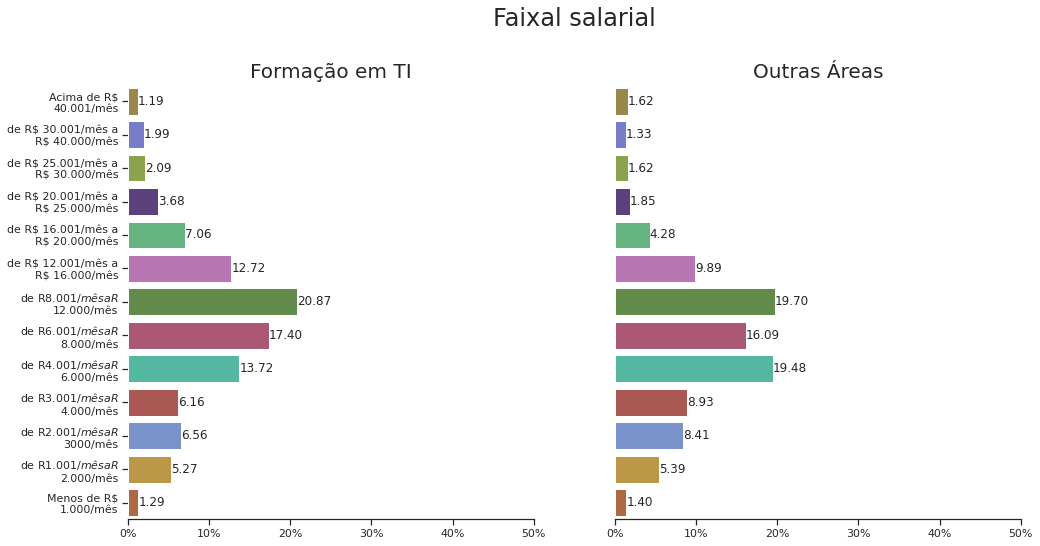

In [126]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(16,8))

top = 1.15
right = 1.1


colors = ["#a68e3f",
          "#6971d7",
          "#91b23e",
          "#5c3686",
          "#58c07b",
          "#c26abb",
          "#609542",
          "#b94973",
          "#43c8ac",
          "#b94b45",
          "#6d8dd7",
          "#d19e34",
          "#bf6433"]

sns.set_theme()
sns.set_style("ticks")
sns.set_palette(colors)



ax1 = sns.barplot(ax= axes[0],data=TI, x=TI[P2_h].value_counts(normalize=True).values*100,
                  y=TI[P2_h].value_counts(normalize=True).index,
                   order=labels_P2_h)

ax1.tick_params(axis='x',labelrotation=0)
ax1.set_xlim(0, 50)
ax1.set(xlabel=None,ylabel=None)
ax1.set_title("Formação em TI",fontdict={'fontsize': 20})

vals = ax1.get_xticks()
ax1.set_xticklabels([str(int(val))+'%' for val in vals])
ax1.set_yticklabels([textwrap.fill(e, 20) for e in labels_P2_h])



ax2 = sns.barplot(ax= axes[1],data=resto, x=resto[P2_h].value_counts(normalize=True).values*100,
                  y=resto[P2_h].value_counts(normalize=True).index,
                   order=labels_P2_h)

ax2.tick_params(axis='x',labelrotation=0)
ax2.set_xlim(0, 50)
ax2.set(xlabel=None, ylabel=None)
ax2.set_title("Outras Áreas",fontdict={'fontsize': 20})
ax2.tick_params(labelleft=False, left=False)



for c in ax1.containers:
    ax1.bar_label(c, fmt=f'%.2f', label_type='edge')

for c in ax2.containers:
    ax2.bar_label(c, fmt=f'%.2f', label_type='edge') 

    
ax1.text(right, top, 'Faixal salarial',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax1.transAxes,
        fontdict={'fontsize': 24})  

sns.despine()
ax2.spines['left'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.show()

Tempo de experiência maior em TI, maior salário.

# Conclusão

zzzzzz